<a href="https://colab.research.google.com/github/habibek1/DSA210_project/blob/main/DSA210_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Styling for plots
sns.set(style="whitegrid")
plt.style.use("ggplot")

# Load the dataset
file_path = 'Filtered_ViewingActivity.csv'  # Replace with the correct path if the file is in another directory
df = pd.read_csv(file_path)

Daily Total Duration in Minutes:
           Date  Duration_in_minutes
0    2021-07-02           280.283333
1    2021-07-03           383.900000
2    2021-07-04             0.033333
3    2021-07-05           397.416667
4    2021-07-06           221.566667
..          ...                  ...
644  2024-11-23           166.866667
645  2024-11-24           279.966667
646  2024-11-25           105.133333
647  2024-11-26           118.416667
648  2024-11-27            12.766667

[649 rows x 2 columns]


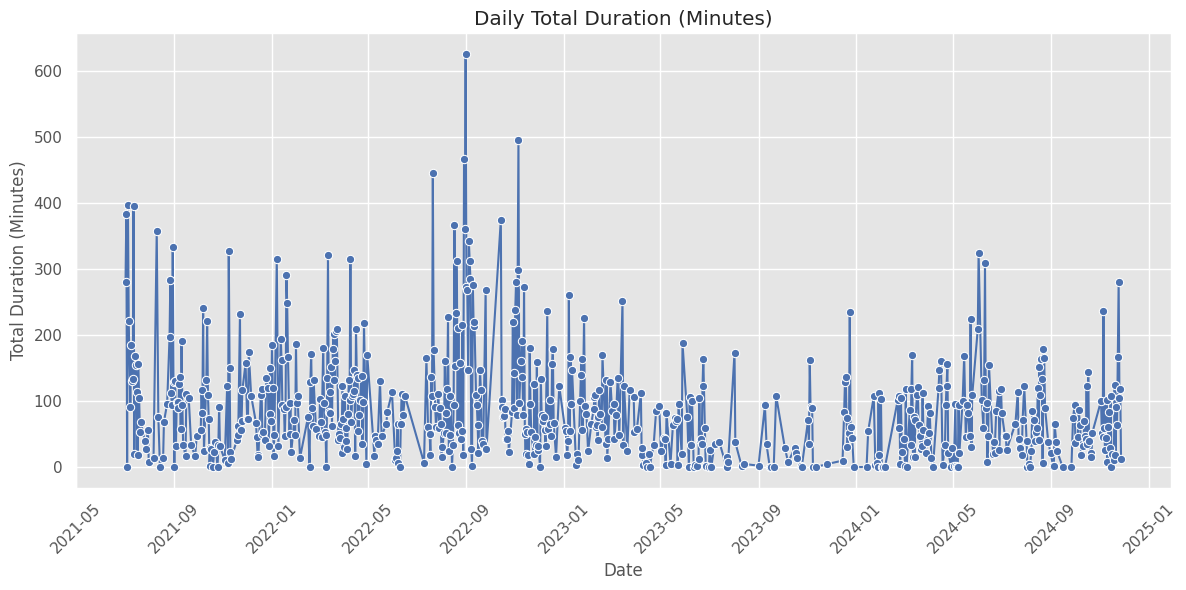

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert 'Start Time' to datetime format
df['Start Time'] = pd.to_datetime(df['Start Time'])

# Convert 'Duration' to total seconds
df['Duration_in_seconds'] = pd.to_timedelta(df['Duration']).dt.total_seconds()

# Convert seconds to minutes for aggregation
df['Duration_in_minutes'] = df['Duration_in_seconds'] / 60

# Extract the date from 'Start Time'
df['Date'] = df['Start Time'].dt.date

# Group by date and calculate the total duration in minutes for each day
daily_duration = df.groupby('Date')['Duration_in_minutes'].sum().reset_index()

# Display the daily total duration in minutes
print("Daily Total Duration in Minutes:")
print(daily_duration)

# Plot the daily total duration in minutes
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_duration, x='Date', y='Duration_in_minutes', marker='o', color='b')
plt.title('Daily Total Duration (Minutes)')
plt.xlabel('Date')
plt.ylabel('Total Duration (Minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-66-4248cb418a5d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration_in_seconds'] = pd.to_timedelta(df['Duration']).dt.total_seconds()
<ipython-input-66-4248cb418a5d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration_in_minutes'] = df['Duration_in_seconds'] / 60
<ipython-input-66-4248cb418a5d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

Daily Total Duration in Minutes:
           Date  Duration_in_minutes
0    2024-01-14             0.133333
1    2024-01-16            54.216667
2    2024-01-23           107.150000
3    2024-01-25             2.433333
4    2024-01-27             6.383333
..          ...                  ...
169  2024-11-23           166.866667
170  2024-11-24           279.966667
171  2024-11-25           105.133333
172  2024-11-26           118.416667
173  2024-11-27            12.766667

[174 rows x 2 columns]


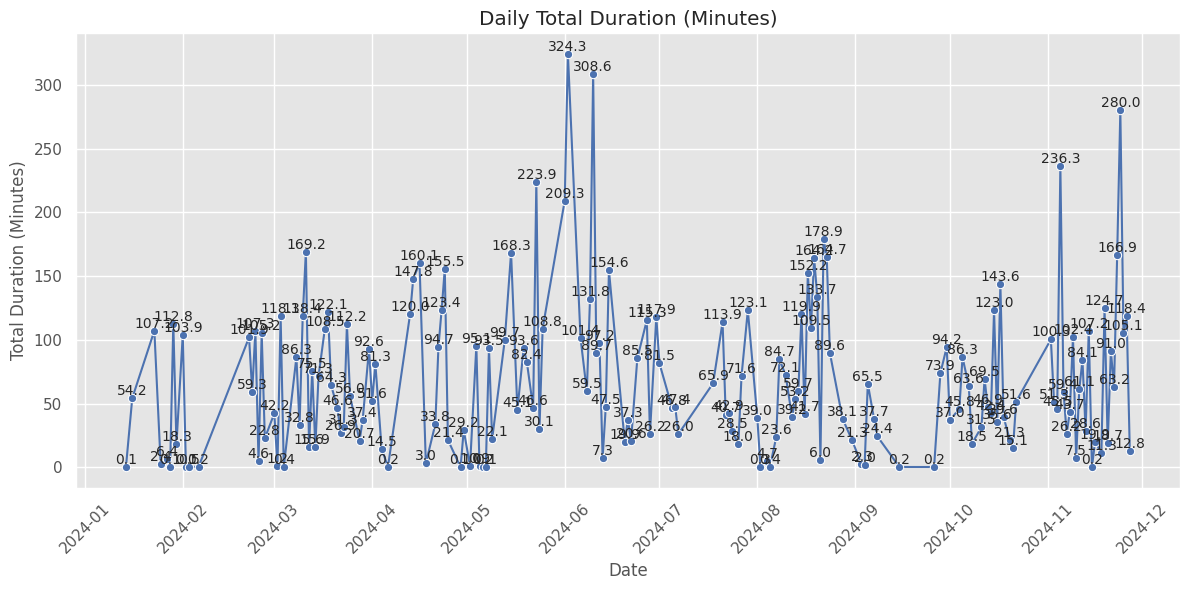

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Start Time' to datetime format
df['Start Time'] = pd.to_datetime(df['Start Time'])

# Filter data to include only entries from January 2024 onwards
df = df[df['Start Time'] >= '2024-01-01']

# Convert 'Duration' to total seconds
df['Duration_in_seconds'] = pd.to_timedelta(df['Duration']).dt.total_seconds()

# Convert seconds to minutes for aggregation
df['Duration_in_minutes'] = df['Duration_in_seconds'] / 60

# Extract the date from 'Start Time'
df['Date'] = df['Start Time'].dt.date

# Group by date and calculate the total duration in minutes for each day
daily_duration = df.groupby('Date')['Duration_in_minutes'].sum().reset_index()

# Display the daily total duration in minutes
print("Daily Total Duration in Minutes:")
print(daily_duration)

# Plot the daily total duration in minutes
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_duration, x='Date', y='Duration_in_minutes', marker='o', color='b')
plt.title('Daily Total Duration (Minutes)')
plt.xlabel('Date')
plt.ylabel('Total Duration (Minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
for x, y in zip(daily_duration['Date'], daily_duration['Duration_in_minutes']):
    plt.text(x, y, f"{y:.1f}", ha='center', va='bottom')
plt.show()


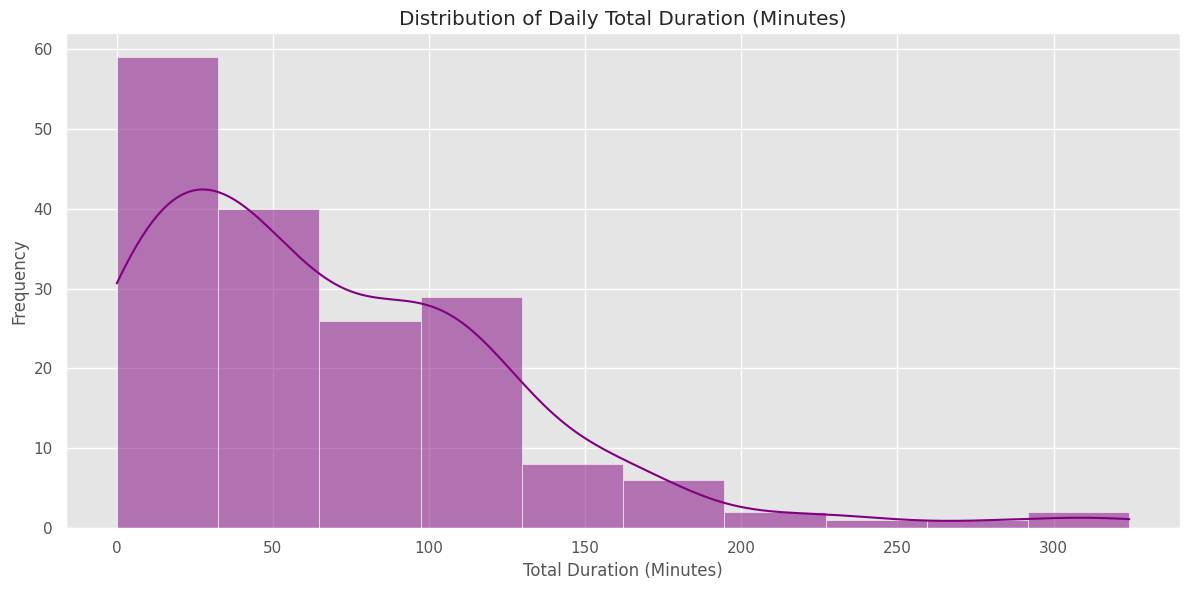

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(daily_duration['Duration_in_minutes'], bins=10, kde=True, color='purple')
plt.title('Distribution of Daily Total Duration (Minutes)')
plt.xlabel('Total Duration (Minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


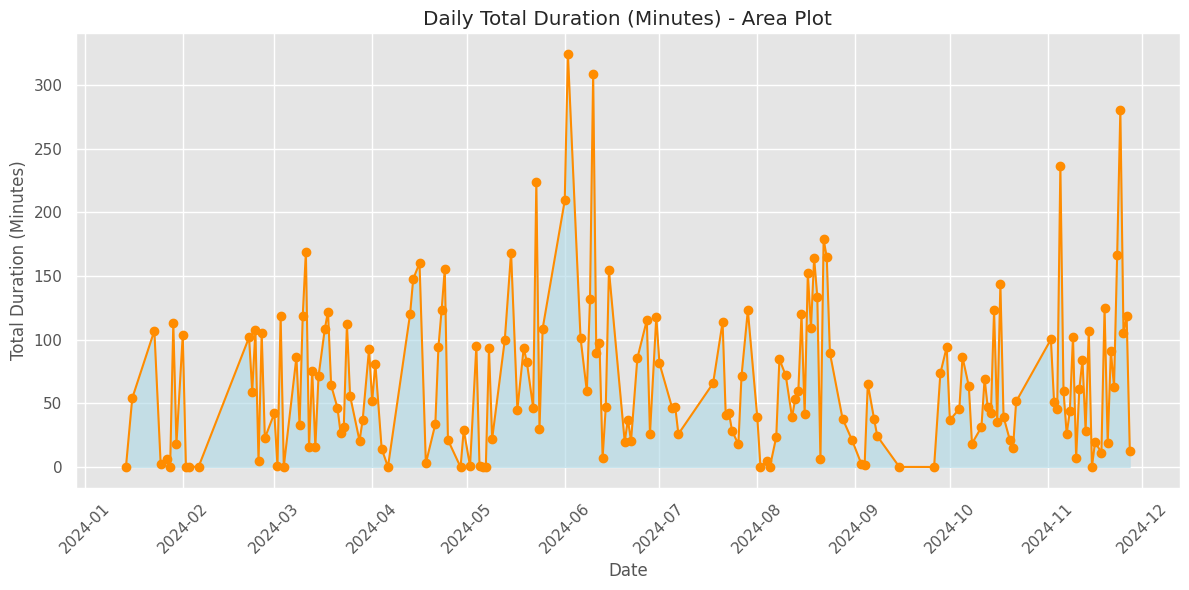

In [ ]:
plt.figure(figsize=(12, 6))
plt.fill_between(daily_duration['Date'], daily_duration['Duration_in_minutes'], color='lightblue', alpha=0.6)
plt.plot(daily_duration['Date'], daily_duration['Duration_in_minutes'], color='darkorange', marker='o')
plt.title('Daily Total Duration (Minutes) - Area Plot')
plt.xlabel('Date')
plt.ylabel('Total Duration (Minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


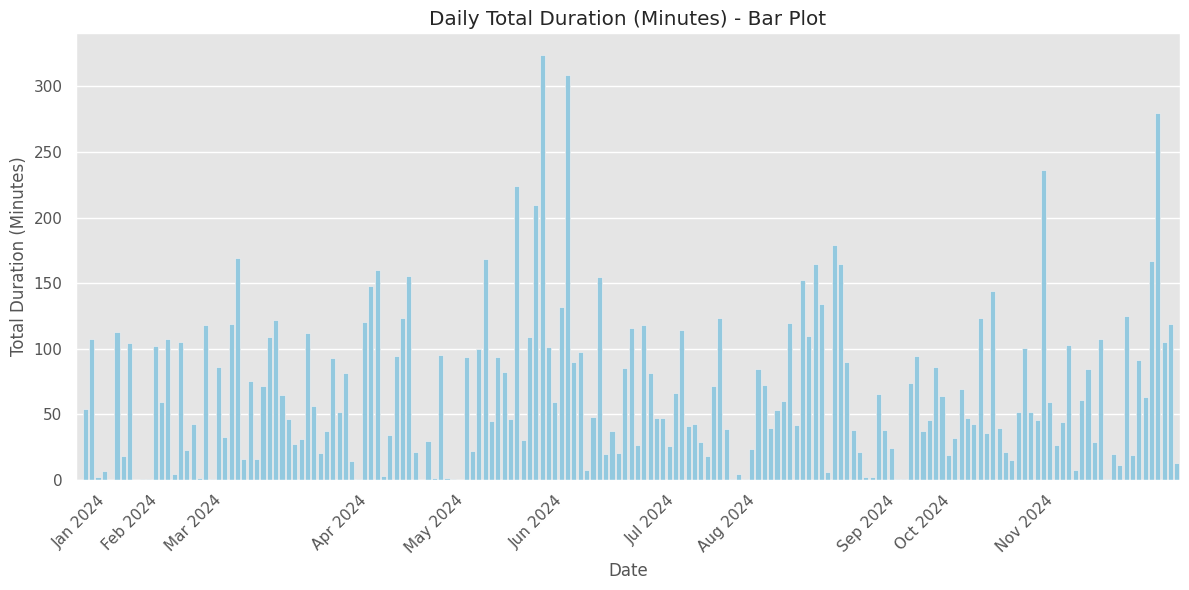

In [ ]:
# Ensure 'Date' column is in datetime format
daily_duration['Date'] = pd.to_datetime(daily_duration['Date'])

# Plot bar plot with daily values
plt.figure(figsize=(12, 6))
sns.barplot(data=daily_duration, x='Date', y='Duration_in_minutes', color='skyblue')

# Customize the x-axis to display only monthly labels
# Get unique monthly ticks
monthly_ticks = daily_duration['Date'].dt.to_period('M').drop_duplicates().dt.to_timestamp()
plt.xticks(ticks=monthly_ticks.index, labels=monthly_ticks.dt.strftime('%b %Y'), rotation=45)

# Add labels and title
plt.title('Daily Total Duration (Minutes) - Bar Plot')
plt.xlabel('Date')
plt.ylabel('Total Duration (Minutes)')
plt.tight_layout()
plt.show()


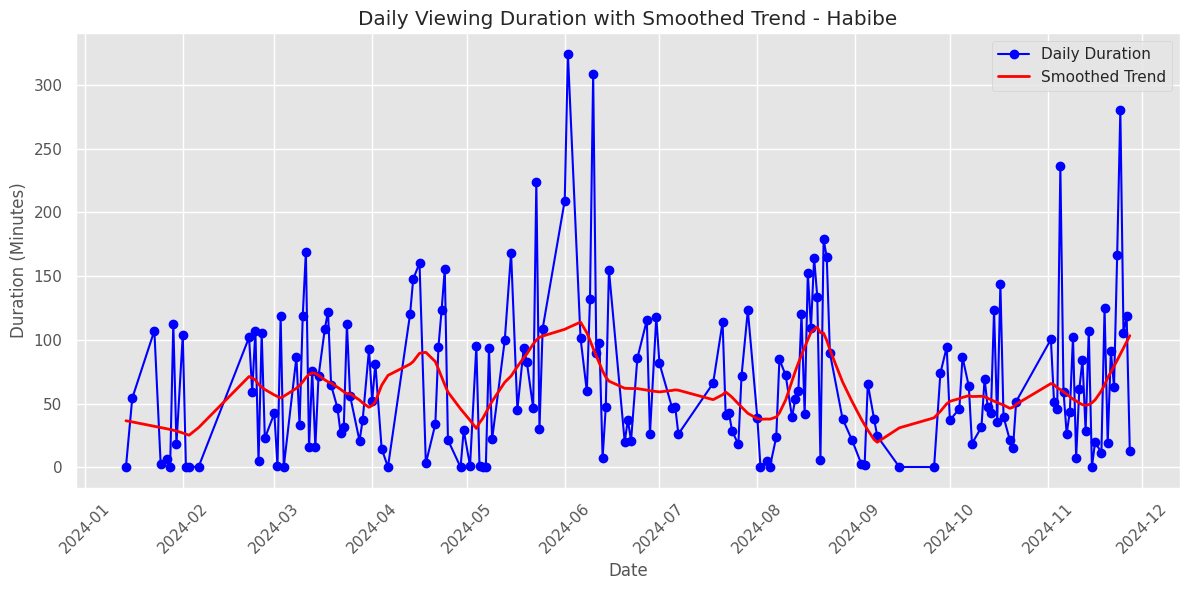

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Ensure 'Start Time' is in datetime format and 'Duration' is in seconds
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['Duration_in_seconds'] = pd.to_timedelta(df['Duration']).dt.total_seconds()

profile_name = 'Habibe'
profile_data = df[df['Profile Name'] == profile_name]

# Check if the profile data is not empty
if profile_data.empty:
    print(f"No data found for profile: {profile_name}")
else:
    # Group by day and sum the durations for the selected profile
    profile_data.loc[:, 'Date'] = profile_data['Start Time'].dt.date
    daily_duration_profile = profile_data.groupby('Date')['Duration_in_seconds'].sum().reset_index()

    # Convert 'Date' to numeric (timestamp) for smoothing
    daily_duration_profile['Date_numeric'] = pd.to_datetime(daily_duration_profile['Date']).astype(int) / 10**9

    # Apply LOWESS smoothing
    lowess = sm.nonparametric.lowess(daily_duration_profile['Duration_in_seconds'],
                                     daily_duration_profile['Date_numeric'], frac=0.1)

    # Convert the smoothed date back to 'datetime' (using Unix timestamps)
    smoothed_dates = pd.to_datetime(lowess[:, 0], unit='s').date

    # Plot the smoothed line along with daily values
    plt.figure(figsize=(12, 6))
    plt.plot(daily_duration_profile['Date'], daily_duration_profile['Duration_in_seconds'] / 60, color='blue', marker='o', label='Daily Duration')
    plt.plot(smoothed_dates, lowess[:, 1] / 60, color='red', label='Smoothed Trend', linewidth=2)
    plt.title(f'Daily Viewing Duration with Smoothed Trend - {profile_name}')
    plt.xlabel('Date')
    plt.ylabel('Duration (Minutes)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


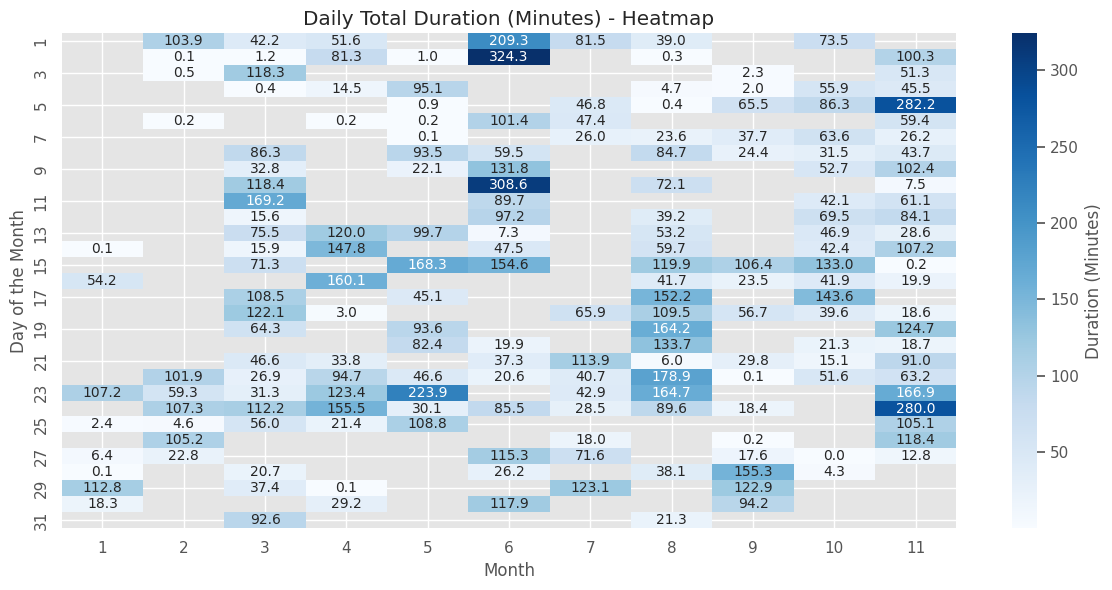

In [ ]:
# Extract month and day for the heatmap
daily_duration['Month'] = pd.to_datetime(daily_duration['Date']).dt.month
daily_duration['Day'] = pd.to_datetime(daily_duration['Date']).dt.day

# Create a pivot table for the heatmap
heatmap_data = daily_duration.pivot_table(values='Duration_in_minutes', index='Day', columns='Month', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".1f", cbar_kws={'label': 'Duration (Minutes)'})
plt.title('Daily Total Duration (Minutes) - Heatmap')
plt.xlabel('Month')
plt.ylabel('Day of the Month')
plt.tight_layout()
plt.show()



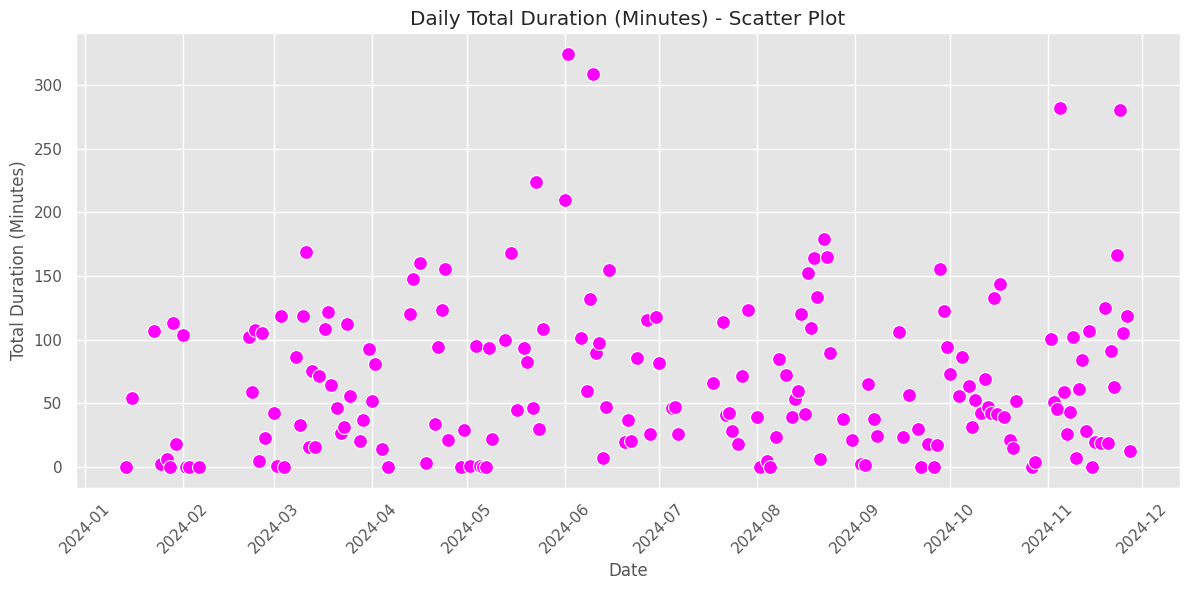

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=daily_duration, x='Date', y='Duration_in_minutes', color='magenta', s=100)
plt.title('Daily Total Duration (Minutes) - Scatter Plot')
plt.xlabel('Date')
plt.ylabel('Total Duration (Minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


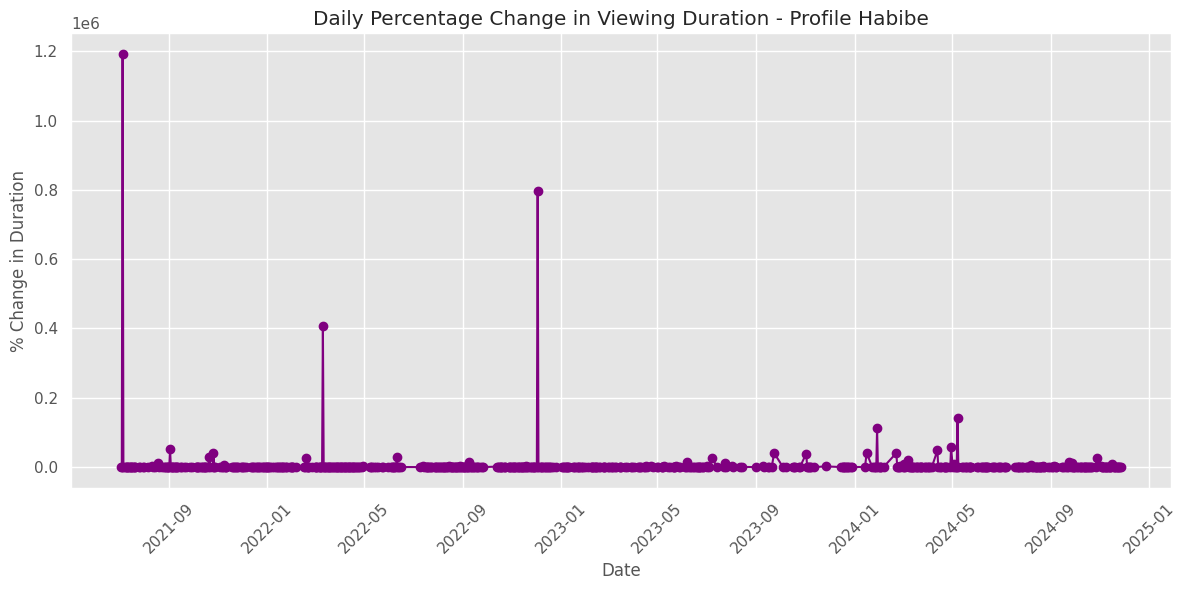

In [ ]:
# Calculate daily percentage change
daily_duration_profile['Pct_Change'] = daily_duration_profile['Duration_in_seconds'].pct_change() * 100

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_duration_profile['Date'], daily_duration_profile['Pct_Change'], color='purple', marker='o', linestyle='-', label='Daily % Change')
plt.title('Daily Percentage Change in Viewing Duration - Profile Habibe')
plt.xlabel('Date')
plt.ylabel('% Change in Duration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


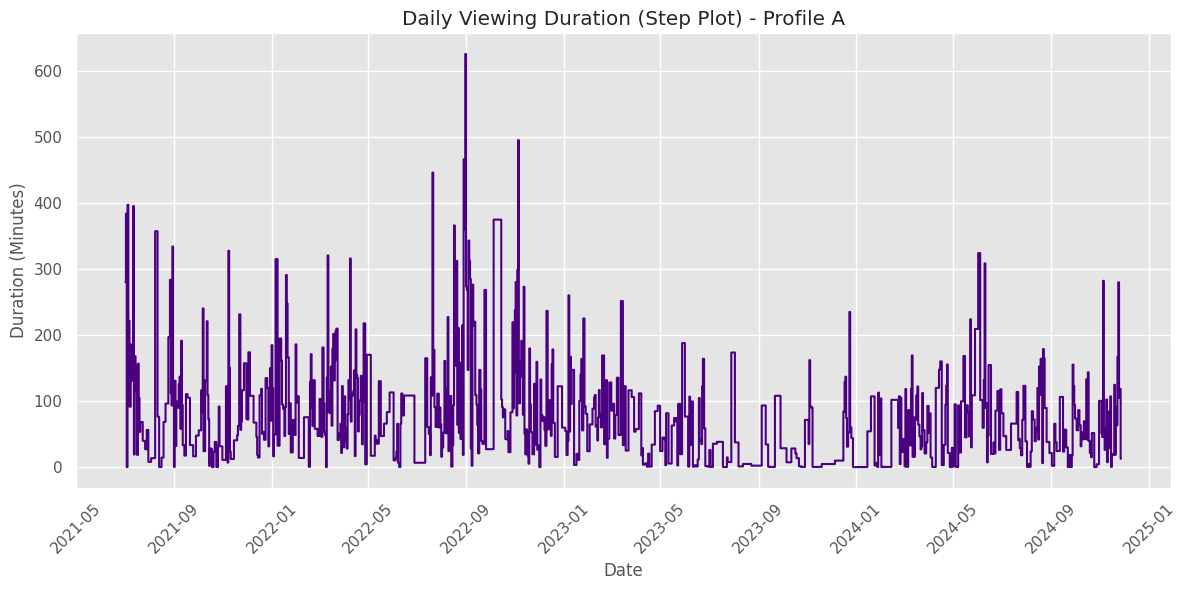

In [ ]:
# Plot step plot for daily activity
plt.figure(figsize=(12, 6))
plt.step(daily_duration_profile['Date'], daily_duration_profile['Duration_in_seconds'] / 60, color='indigo', where='mid', label='Daily Duration')
plt.title('Daily Viewing Duration (Step Plot) - Profile A')
plt.xlabel('Date')
plt.ylabel('Duration (Minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd

# Parse the XML file
tree = ET.parse('export.xml')  # Replace 'step_data.xml' with the actual path to your XML file
root = tree.getroot()

# Initialize lists to store data
timestamps = []
steps = []

# Extract step count from each Record or Workout element (depending on your data)
for record in root.findall('.//Record'):
    # Check if the record contains a value that could be related to steps
    if 'type' in record.attrib and record.attrib['type'] == 'HKQuantityTypeIdentifierStepCount':
        # Get timestamp and step count values
        start_time = record.attrib.get('startDate')
        end_time = record.attrib.get('endDate')
        step_count = record.attrib.get('value')  # Adjust attribute name as per XML data

        # Convert timestamps to datetime and remove timezone offset
        start_time = pd.to_datetime(start_time).replace(tzinfo=None)
        end_time = pd.to_datetime(end_time).replace(tzinfo=None)

        # Append the data to lists
        timestamps.append(start_time)
        steps.append(step_count)

# If no step counts found, check other potential places (e.g., ActivitySummary)
if not timestamps:
    for activity in root.findall('.//ActivitySummary'):
        # Extract relevant information for activity (steps or calories, etc.)
        date = activity.attrib.get('dateComponents')
        step_count = activity.attrib.get('activeEnergyBurned')  # Change if steps are under another attribute

        # Append the data to lists
        timestamps.append(date)
        steps.append(step_count)

# Create a DataFrame from the lists
df = pd.DataFrame({
    'Timestamp': timestamps,
    'Steps': steps
})

# Save the DataFrame to a CSV file
df.to_csv('step_data.csv', index=False)

print("CSV file has been created: step_data.csv")


CSV file has been created: step_data.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Styling for plots
sns.set(style="whitegrid")
plt.style.use("ggplot")

# Load the step data
steps_df = pd.read_csv('step_data.csv')  # Replace with the correct path to your step data CSV

# Convert 'Timestamp' to datetime and filter data from January 2024
steps_df['Timestamp'] = pd.to_datetime(steps_df['Timestamp'])
steps_df = steps_df[steps_df['Timestamp'] >= '2024-01-01']

# Extract the date and group by date to calculate daily total steps
steps_df['Date'] = steps_df['Timestamp'].dt.date
daily_steps = steps_df.groupby('Date')['Steps'].sum().reset_index()

# Scale step counts to hundreds for better visualization
daily_steps['Steps_in_Hundreds'] = daily_steps['Steps'] / 100


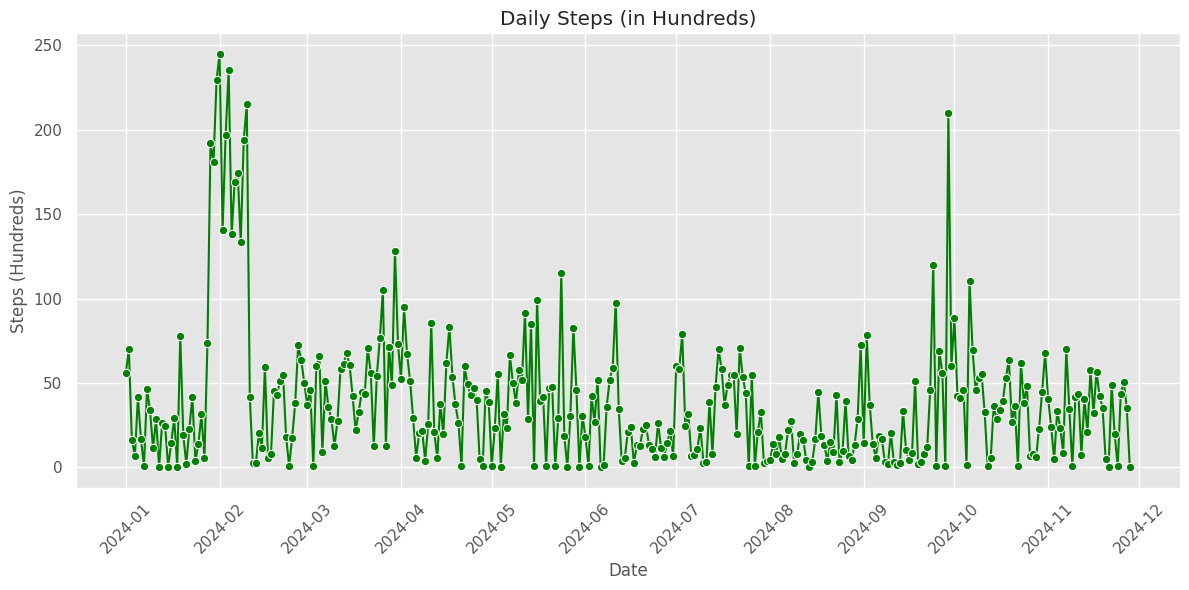

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_steps, x='Date', y='Steps_in_Hundreds', marker='o', color='green')
plt.title('Daily Steps (in Hundreds)')
plt.xlabel('Date')
plt.ylabel('Steps (Hundreds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


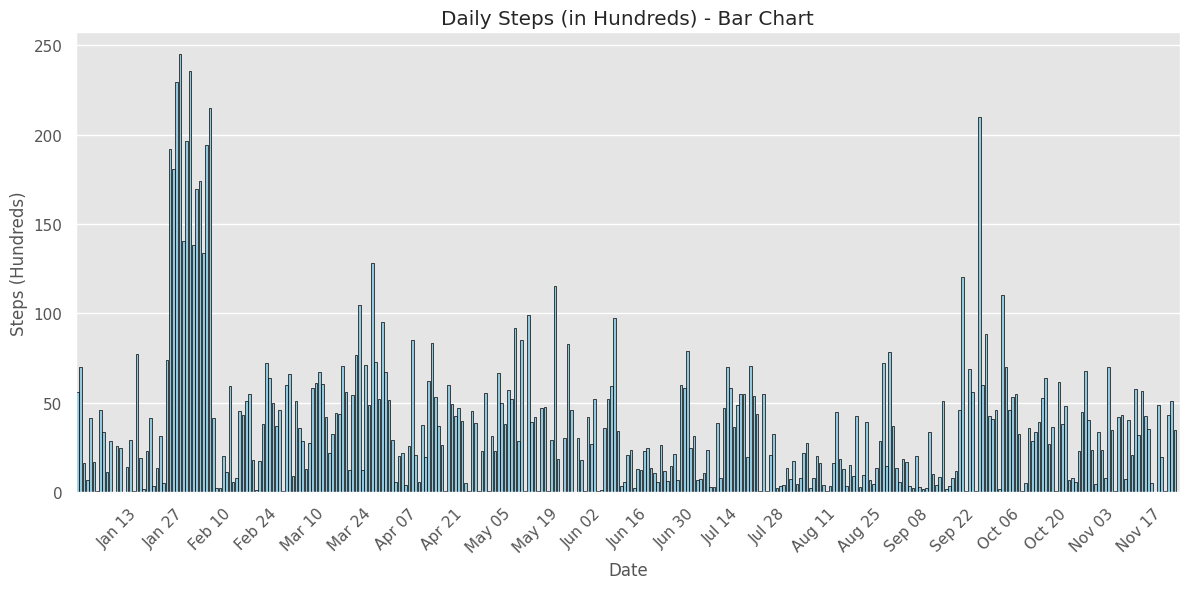

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))

# Bar chart
sns.barplot(data=daily_steps, x='Date', y='Steps_in_Hundreds', color='skyblue', edgecolor='black')

# Title and labels
plt.title('Daily Steps (in Hundreds) - Bar Chart')
plt.xlabel('Date')
plt.ylabel('Steps (Hundreds)')

# Simplify date ticks
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))  # Show ticks every 2 weeks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Format as 'Jan 01'

plt.tight_layout()
plt.show()


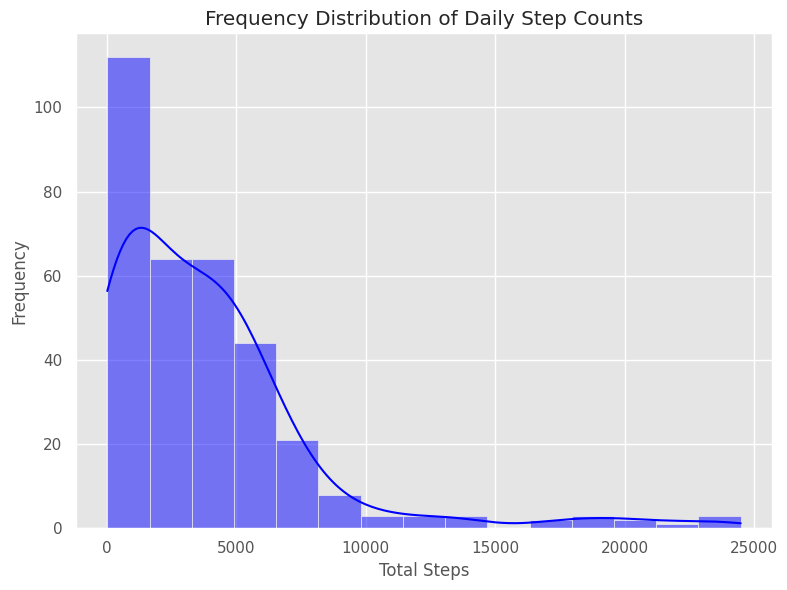

In [ ]:
plt.figure(figsize=(8, 6))

# Histogram
sns.histplot(data=daily_steps, x='Steps', bins=15, color='blue', kde=True)

# Title and labels
plt.title('Frequency Distribution of Daily Step Counts')
plt.xlabel('Total Steps')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


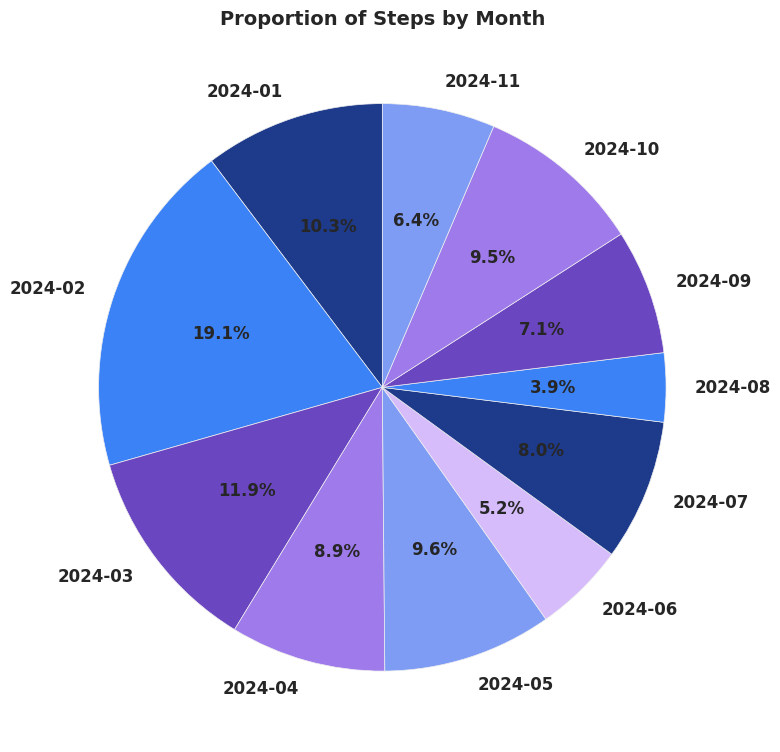

In [ ]:
# Aggregate steps data by month
steps_df['Month'] = steps_df['Timestamp'].dt.to_period('M')
monthly_steps = steps_df.groupby('Month')['Steps'].sum()

# Define a custom blue and purple color palette
blue_purple_palette = ['#1E3A8A', '#3B82F6', '#6B46C1', '#9F7AEA', '#7F9CF5', '#D6BCFA']

# Create the pie chart with the blue and purple palette
plt.figure(figsize=(8, 8))
monthly_steps.plot.pie(autopct='%1.1f%%', startangle=90,
                       colors=blue_purple_palette, textprops={'fontsize': 12, 'weight': 'bold'})

# Title and layout adjustments
plt.title('Proportion of Steps by Month', fontsize=14, weight='bold')
plt.ylabel('')  # Remove the y-axis label for a cleaner look
plt.tight_layout()
plt.show()


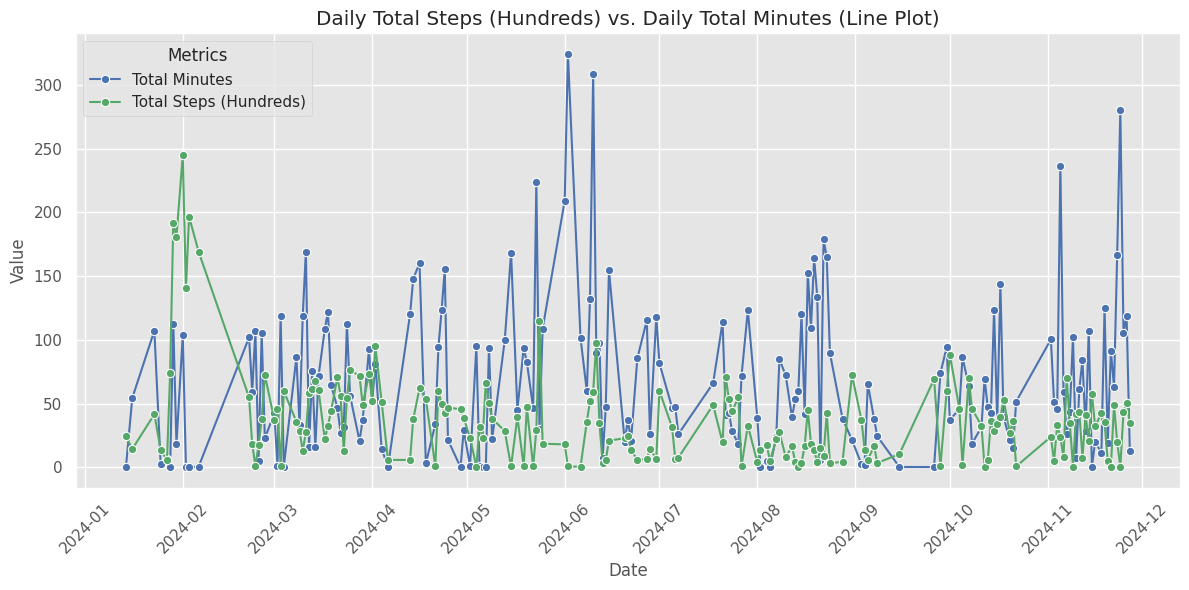

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Styling for plots
sns.set(style="whitegrid")
plt.style.use("ggplot")

# Load the datasets
steps_df = pd.read_csv('step_data.csv')  # Replace with the correct path to your step data CSV
activity_df = pd.read_csv('Filtered_ViewingActivity.csv')  # Replace with the correct path to your activity data CSV

activity_df['Start Time'] = pd.to_datetime(activity_df['Start Time'])
activity_df = activity_df[activity_df['Start Time'] >= '2024-01-01']

# Convert 'Duration' to total seconds and then to minutes for the activity data
activity_df['Duration_in_seconds'] = pd.to_timedelta(activity_df['Duration']).dt.total_seconds()
activity_df['Duration_in_minutes'] = activity_df['Duration_in_seconds'] / 60

# Extract date from 'Start Time' for the activity data
activity_df['Date'] = activity_df['Start Time'].dt.date

# Group by date and calculate the total duration in minutes for each day
daily_activity = activity_df.groupby('Date')['Duration_in_minutes'].sum().reset_index()

# Filter step data to start from 2024-01-01
steps_df['Timestamp'] = pd.to_datetime(steps_df['Timestamp'])
steps_df = steps_df[steps_df['Timestamp'] >= '2024-01-01']

# Extract date and group by date to calculate the total steps for each day
steps_df['Date'] = steps_df['Timestamp'].dt.date
daily_steps = steps_df.groupby('Date')['Steps'].sum().reset_index()

# Scale step counts to hundreds (divide by 100)
daily_steps['Steps_in_Hundreds'] = daily_steps['Steps'] / 100

# Merge both dataframes on the 'Date' column
merged_df = pd.merge(daily_activity, daily_steps, on='Date', how='outer')

# Filter out rows where either 'Steps' or 'Duration_in_minutes' is zero
filtered_df = merged_df[(merged_df['Steps'] > 0) & (merged_df['Duration_in_minutes'] > 0)]

# Plotting both daily total steps (in hundreds) and daily total minutes as line plots
plt.figure(figsize=(12, 6))

# Plot the line for total minutes
sns.lineplot(data=merged_df, x='Date', y='Duration_in_minutes', marker='o', label='Total Minutes', color='b')

# Plot the line for total steps (scaled to hundreds)
sns.lineplot(data=filtered_df, x='Date', y='Steps_in_Hundreds', marker='o', label='Total Steps (Hundreds)', color='g')

# Customize the plot
plt.title('Daily Total Steps (Hundreds) vs. Daily Total Minutes (Line Plot)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


Number of valid data points: 184
Correlation Coefficient: -0.1073
P-value: 0.1473
R-squared: 0.0115

The correlation between Netflix activity and steps is not statistically significant (p = 0.1473)
The correlation explains 1.2% of the variance in the data

Data Summary:

Missing values before cleaning:
Duration_in_minutes    149
Steps_in_Hundreds        0
dtype: int64

Missing values after cleaning:
Duration_in_minutes    0
Steps_in_Hundreds      0
dtype: int64


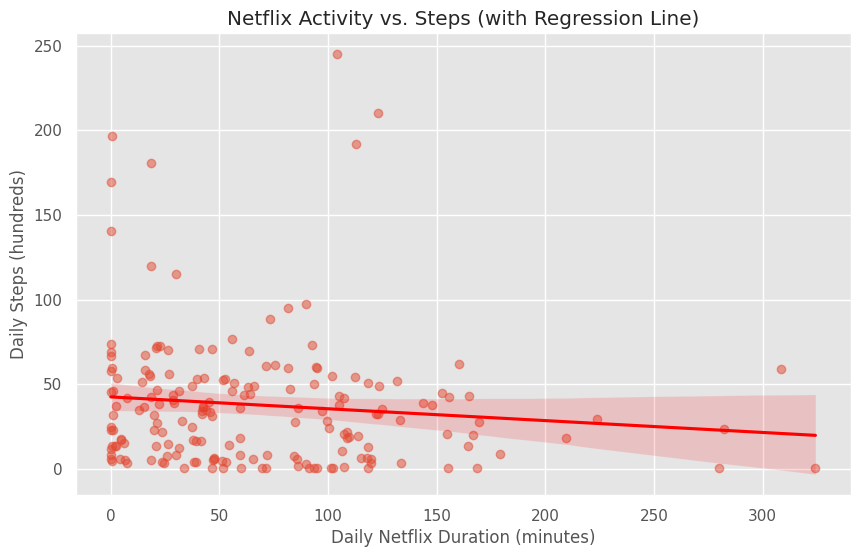

In [ ]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows where either column has missing values
clean_df = merged_df.dropna(subset=['Duration_in_minutes', 'Steps_in_Hundreds'])

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(
    clean_df['Duration_in_minutes'],
    clean_df['Steps_in_Hundreds']
)

# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    data=clean_df,
    x='Duration_in_minutes',
    y='Steps_in_Hundreds',
    scatter_kws={'alpha':0.5},
    line_kws={'color': 'red'}
)

plt.title('Netflix Activity vs. Steps (with Regression Line)')
plt.xlabel('Daily Netflix Duration (minutes)')
plt.ylabel('Daily Steps (hundreds)')

# Print statistical results
print(f"Number of valid data points: {len(clean_df)}")
print(f"Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Calculate R-squared
r_squared = correlation_coefficient ** 2
print(f"R-squared: {r_squared:.4f}")

# Print interpretation
if p_value < 0.05:
    significance = "statistically significant"
else:
    significance = "not statistically significant"

print(f"\nThe correlation between Netflix activity and steps is {significance} (p = {p_value:.4f})")
print(f"The correlation explains {(r_squared * 100):.1f}% of the variance in the data")

# Additional diagnostic information
print("\nData Summary:")
print("\nMissing values before cleaning:")
print(merged_df[['Duration_in_minutes', 'Steps_in_Hundreds']].isnull().sum())
print("\nMissing values after cleaning:")
print(clean_df[['Duration_in_minutes', 'Steps_in_Hundreds']].isnull().sum())

<ipython-input-34-6620183d1dba>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steps_df['Date'] = steps_df['Timestamp'].dt.date


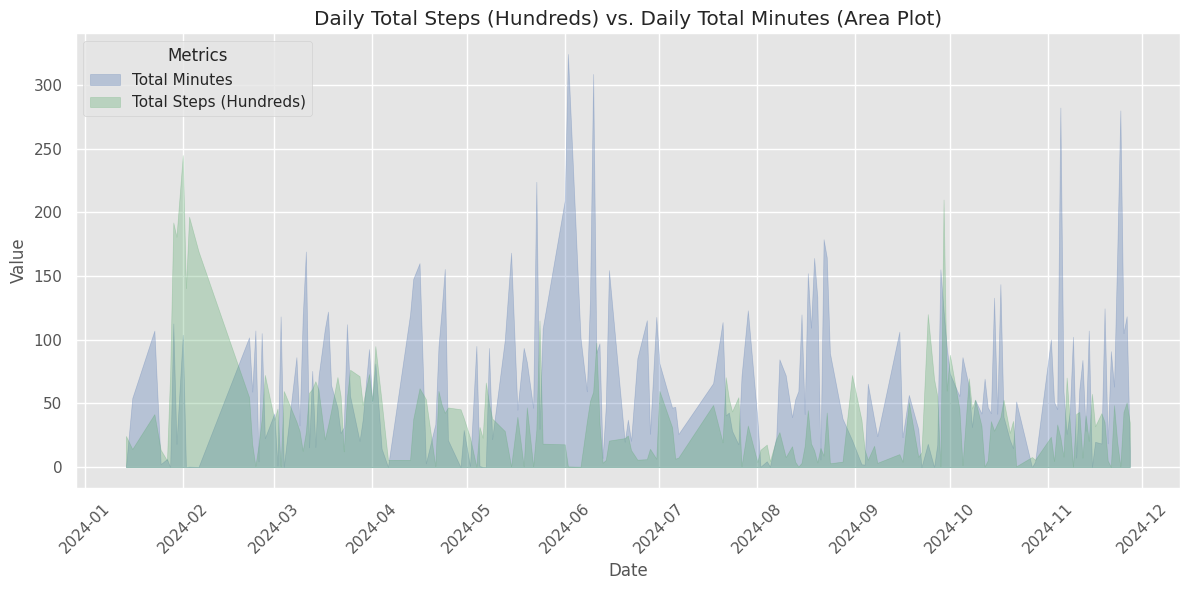

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Styling for plots
sns.set(style="whitegrid")
plt.style.use("ggplot")

# Load the datasets
steps_df = pd.read_csv('step_data.csv')  # Replace with the correct path to your step data CSV
activity_df = pd.read_csv('ViewingActivity.csv')  # Replace with the correct path to your activity data CSV

# Filter the activity data for the 'Habibe' profile and from January 2024 onwards
activity_df = activity_df[activity_df['Profile Name'] == 'Habibe']
activity_df['Start Time'] = pd.to_datetime(activity_df['Start Time'])
activity_df = activity_df[activity_df['Start Time'] >= '2024-01-01']

# Convert 'Duration' to total seconds and then to minutes for the activity data
activity_df['Duration_in_seconds'] = pd.to_timedelta(activity_df['Duration']).dt.total_seconds()
activity_df['Duration_in_minutes'] = activity_df['Duration_in_seconds'] / 60

# Extract date from 'Start Time' for the activity data
activity_df['Date'] = activity_df['Start Time'].dt.date

# Group by date and calculate the total duration in minutes for each day
daily_activity = activity_df.groupby('Date')['Duration_in_minutes'].sum().reset_index()

# Filter step data to start from 2024-01-01
steps_df['Timestamp'] = pd.to_datetime(steps_df['Timestamp'])
steps_df = steps_df[steps_df['Timestamp'] >= '2024-01-01']

# Extract date and group by date to calculate the total steps for each day
steps_df['Date'] = steps_df['Timestamp'].dt.date
daily_steps = steps_df.groupby('Date')['Steps'].sum().reset_index()

# Scale step counts to hundreds (divide by 100)
daily_steps['Steps_in_Hundreds'] = daily_steps['Steps'] / 100

# Merge both dataframes on the 'Date' column
merged_df = pd.merge(daily_activity, daily_steps, on='Date', how='outer')

# Plotting both daily total steps (in hundreds) and daily total minutes as area plots
plt.figure(figsize=(12, 6))

# Filter out rows where either 'Steps' or 'Duration_in_minutes' is zero
filtered_df = merged_df[(merged_df['Steps'] > 0) & (merged_df['Duration_in_minutes'] > 0)]

# Plot area for total minutes
plt.fill_between(filtered_df['Date'], filtered_df['Duration_in_minutes'], color='b', alpha=0.3, label='Total Minutes')

# Plot area for total steps (scaled to hundreds)
plt.fill_between(filtered_df['Date'], filtered_df['Steps_in_Hundreds'], color='g', alpha=0.3, label='Total Steps (Hundreds)')

# Customize the plot
plt.title('Daily Total Steps (Hundreds) vs. Daily Total Minutes (Area Plot)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


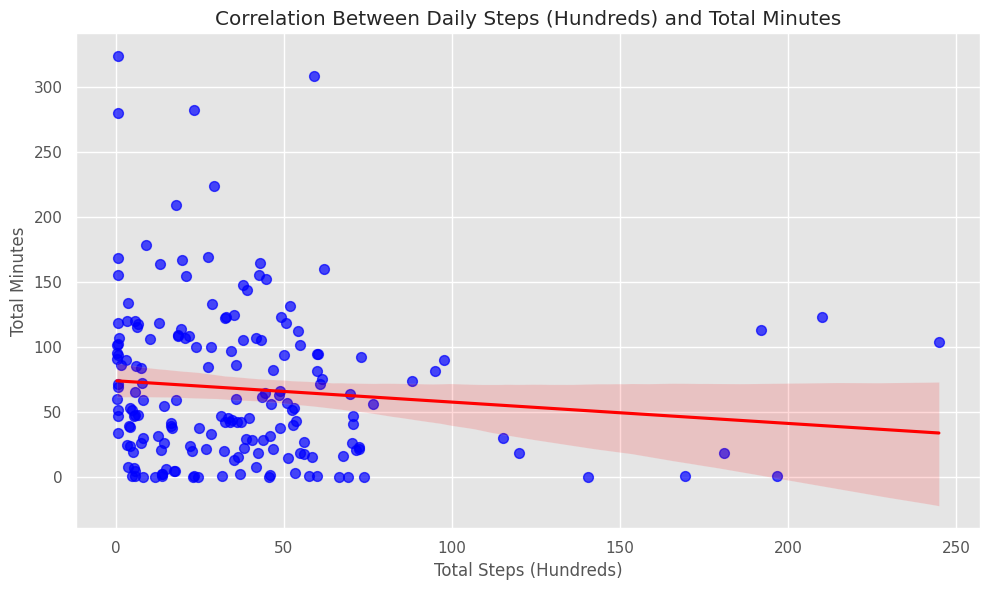

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Styling for plots
sns.set(style="whitegrid")
plt.style.use("ggplot")

# Load the datasets
steps_df = pd.read_csv('step_data.csv')  # Replace with the correct path to your step data CSV
activity_df = pd.read_csv('ViewingActivity.csv')  # Replace with the correct path to your activity data CSV

# Filter the activity data for the 'Habibe' profile and from January 2024 onwards
activity_df = activity_df[activity_df['Profile Name'] == 'Habibe']
activity_df['Start Time'] = pd.to_datetime(activity_df['Start Time'])
activity_df = activity_df[activity_df['Start Time'] >= '2024-01-01']

# Convert 'Duration' to total seconds and then to minutes for the activity data
activity_df['Duration_in_seconds'] = pd.to_timedelta(activity_df['Duration']).dt.total_seconds()
activity_df['Duration_in_minutes'] = activity_df['Duration_in_seconds'] / 60

# Extract date from 'Start Time' for the activity data
activity_df['Date'] = activity_df['Start Time'].dt.date

# Group by date and calculate the total duration in minutes for each day
daily_activity = activity_df.groupby('Date')['Duration_in_minutes'].sum().reset_index()

# Filter step data to start from 2024-01-01
steps_df['Timestamp'] = pd.to_datetime(steps_df['Timestamp'])
steps_df = steps_df[steps_df['Timestamp'] >= '2024-01-01']

# Extract date and group by date to calculate the total steps for each day
steps_df['Date'] = steps_df['Timestamp'].dt.date
daily_steps = steps_df.groupby('Date')['Steps'].sum().reset_index()

# Scale step counts to hundreds (divide by 100)
daily_steps['Steps_in_Hundreds'] = daily_steps['Steps'] / 100

# Merge both dataframes on the 'Date' column
merged_df = pd.merge(daily_activity, daily_steps, on='Date', how='inner')

# Plotting scatter plot with regression line
plt.figure(figsize=(10, 6))

sns.regplot(
    data=merged_df,
    x='Steps_in_Hundreds',
    y='Duration_in_minutes',
    scatter_kws={'s': 50, 'alpha': 0.7},
    line_kws={'color': 'red'},
    color='blue'
)

# Customize the plot
plt.title('Correlation Between Daily Steps (Hundreds) and Total Minutes')
plt.xlabel('Total Steps (Hundreds)')
plt.ylabel('Total Minutes')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


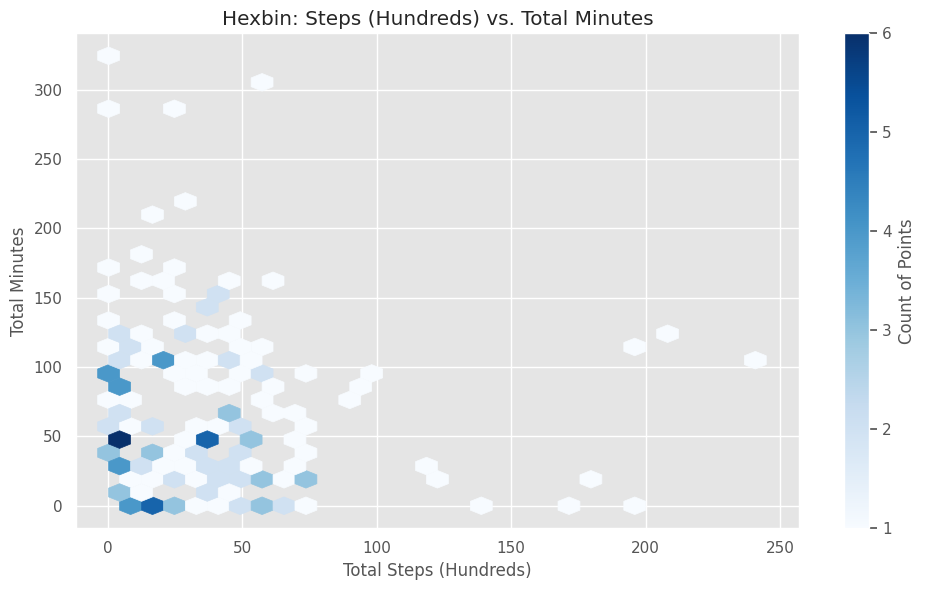

In [ ]:
plt.figure(figsize=(10, 6))
plt.hexbin(
    merged_df['Steps_in_Hundreds'],
    merged_df['Duration_in_minutes'],
    gridsize=30,
    cmap='Blues',
    mincnt=1
)

plt.colorbar(label='Count of Points')
plt.title('Hexbin: Steps (Hundreds) vs. Total Minutes')
plt.xlabel('Total Steps (Hundreds)')
plt.ylabel('Total Minutes')
plt.tight_layout()
plt.show()


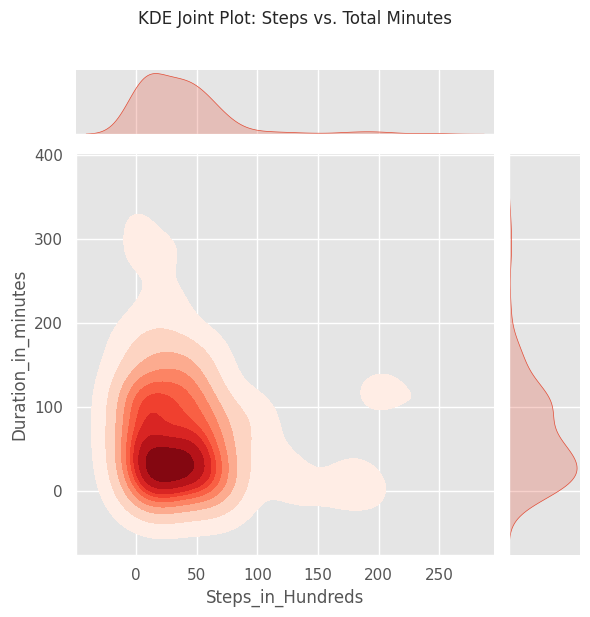

In [ ]:
sns.jointplot(
    data=merged_df,
    x='Steps_in_Hundreds',
    y='Duration_in_minutes',
    kind='kde',
    fill=True,
    cmap='Reds',
    space=0
)

plt.suptitle('KDE Joint Plot: Steps vs. Total Minutes', y=1.02)
plt.tight_layout()
plt.show()


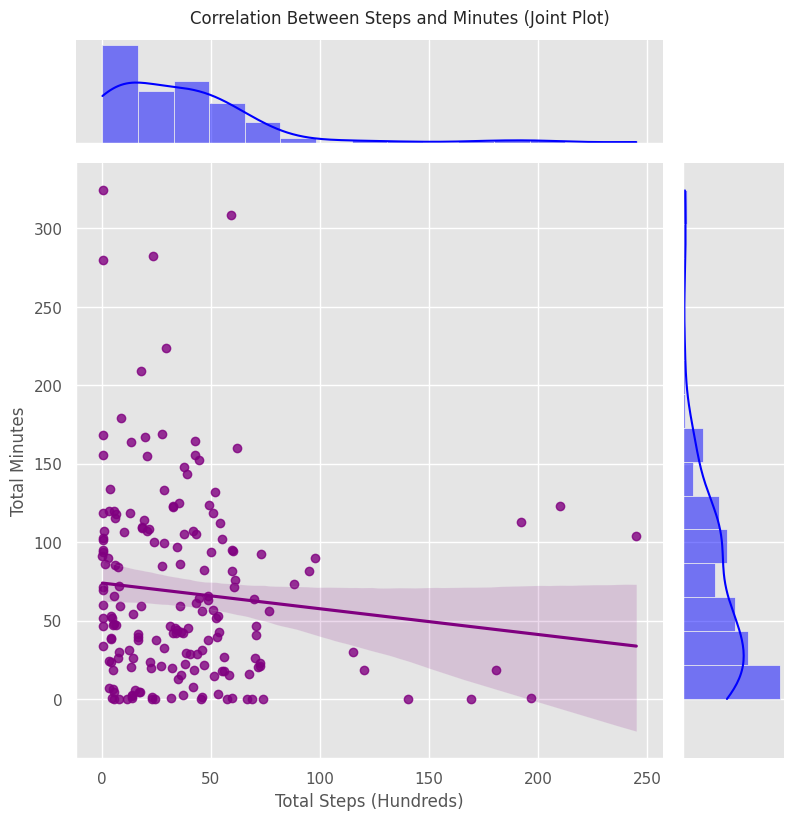

In [ ]:
sns.jointplot(
    data=merged_df,
    x='Steps_in_Hundreds',
    y='Duration_in_minutes',
    kind='reg',  # Regression line with scatter plot
    height=8,
    marginal_kws=dict(bins=15, fill=True, color='blue'),
    color='purple'
)

plt.suptitle("Correlation Between Steps and Minutes (Joint Plot)", y=1.02)
plt.xlabel("Total Steps (Hundreds)")
plt.ylabel("Total Minutes")
plt.show()


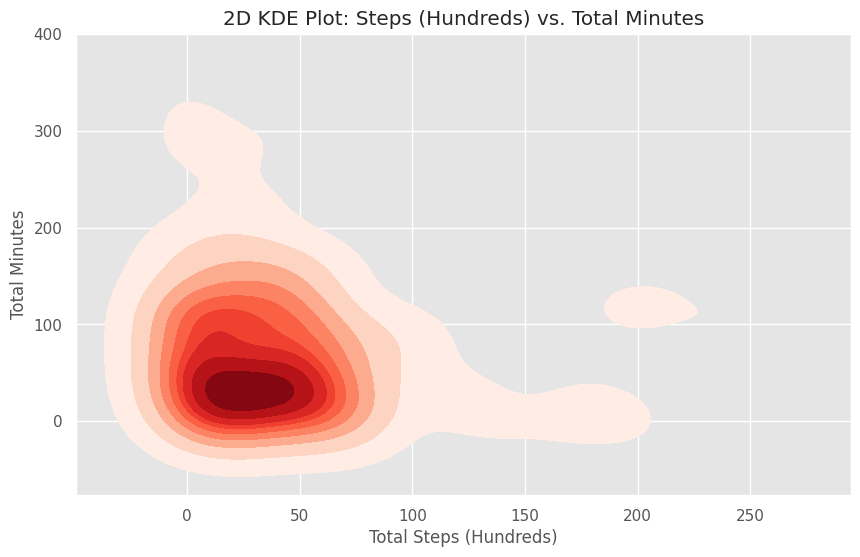

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=merged_df,
    x='Steps_in_Hundreds',
    y='Duration_in_minutes',
    cmap="Reds",
    fill=True,
    thresh=0.05
)

plt.title("2D KDE Plot: Steps (Hundreds) vs. Total Minutes")
plt.xlabel("Total Steps (Hundreds)")
plt.ylabel("Total Minutes")
plt.show()


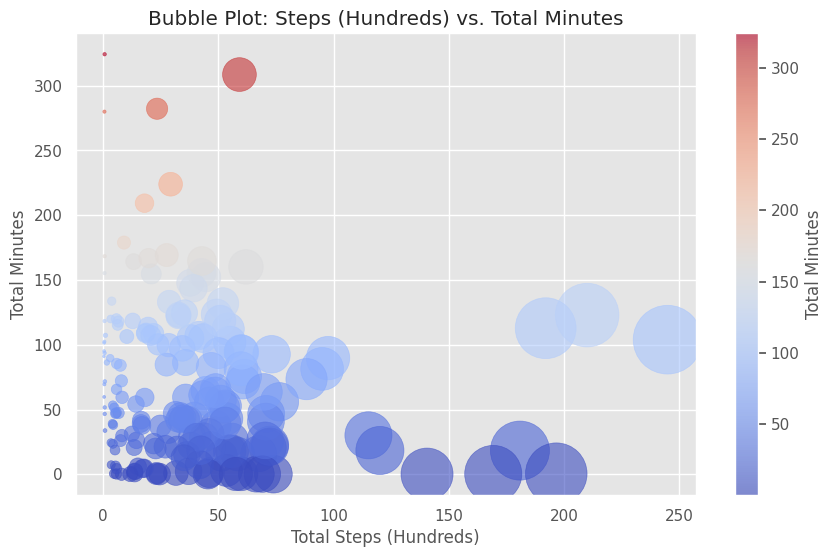

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(
    merged_df['Steps_in_Hundreds'],
    merged_df['Duration_in_minutes'],
    s=merged_df['Steps_in_Hundreds'] * 10,  # Scale bubble size
    alpha=0.6,
    c=merged_df['Duration_in_minutes'],
    cmap='coolwarm'
)

plt.colorbar(label='Total Minutes')
plt.title("Bubble Plot: Steps (Hundreds) vs. Total Minutes")
plt.xlabel("Total Steps (Hundreds)")
plt.ylabel("Total Minutes")
plt.grid(True)
plt.show()


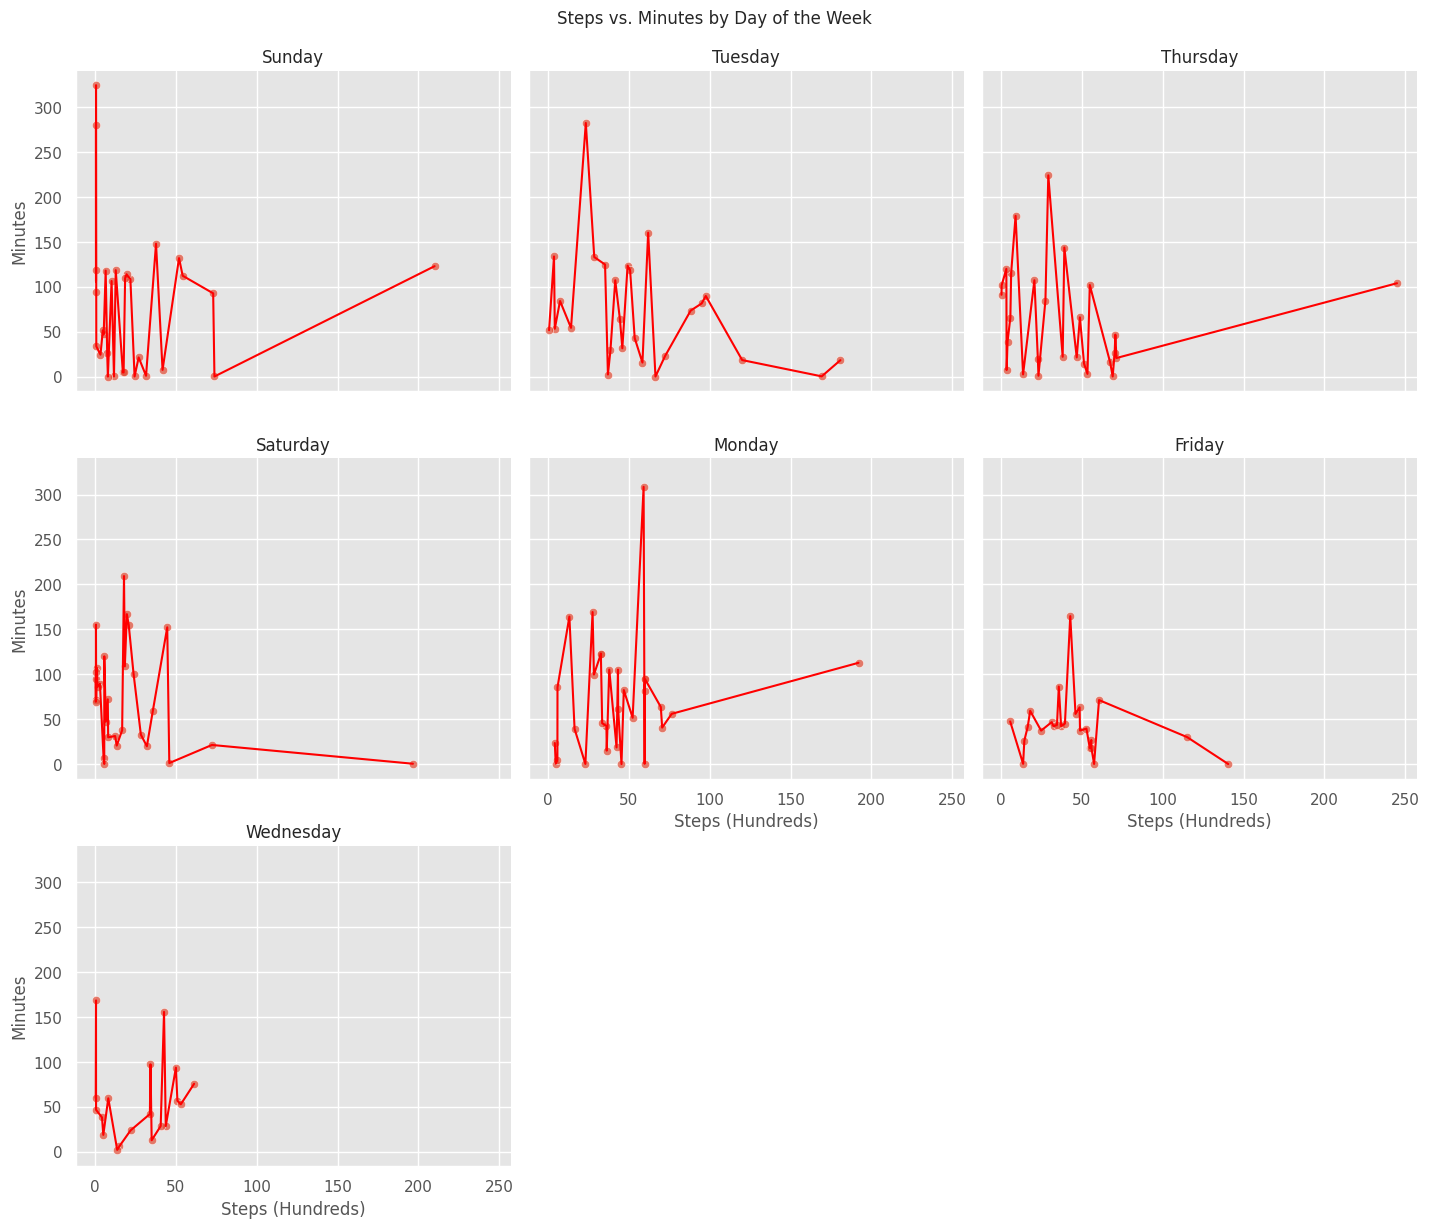

In [ ]:
# Adding a "Day of Week" column for grouping (optional)
merged_df['Day_of_Week'] = pd.to_datetime(merged_df['Date']).dt.day_name()

g = sns.FacetGrid(merged_df, col="Day_of_Week", col_wrap=3, height=4, aspect=1.2)
g.map_dataframe(
    sns.scatterplot,
    x="Steps_in_Hundreds",
    y="Duration_in_minutes",
    alpha=0.7
)
g.map_dataframe(
    sns.lineplot,
    x="Steps_in_Hundreds",
    y="Duration_in_minutes",
    color="red"
)
g.set_titles("{col_name}")
g.set_axis_labels("Steps (Hundreds)", "Minutes")
g.fig.suptitle("Steps vs. Minutes by Day of the Week", y=1.02)
plt.show()


Sample of activity data with duration in minutes:
               Start Time  Duration  Duration_in_minutes
2293  2024-11-27 23:17:34  00:12:46            12.766667
2294  2024-11-26 19:48:30  00:00:01             0.016667
2295  2024-11-26 17:42:23  00:31:06            31.100000
2296  2024-11-26 17:33:02  00:10:15            10.250000
2297  2024-11-26 16:15:20  00:32:09            32.150000
Weekly aggregated data:
   Year  Week   Steps  Duration_in_minutes  Steps_in_Hundreds
0  2024     1   20820             0.000000             208.20
1  2024     2   17079             0.133333             170.79
2  2024     3   14271            54.216667             142.71
3  2024     4   19204           116.066667             192.04
4  2024     5  141958           235.533333            1419.58


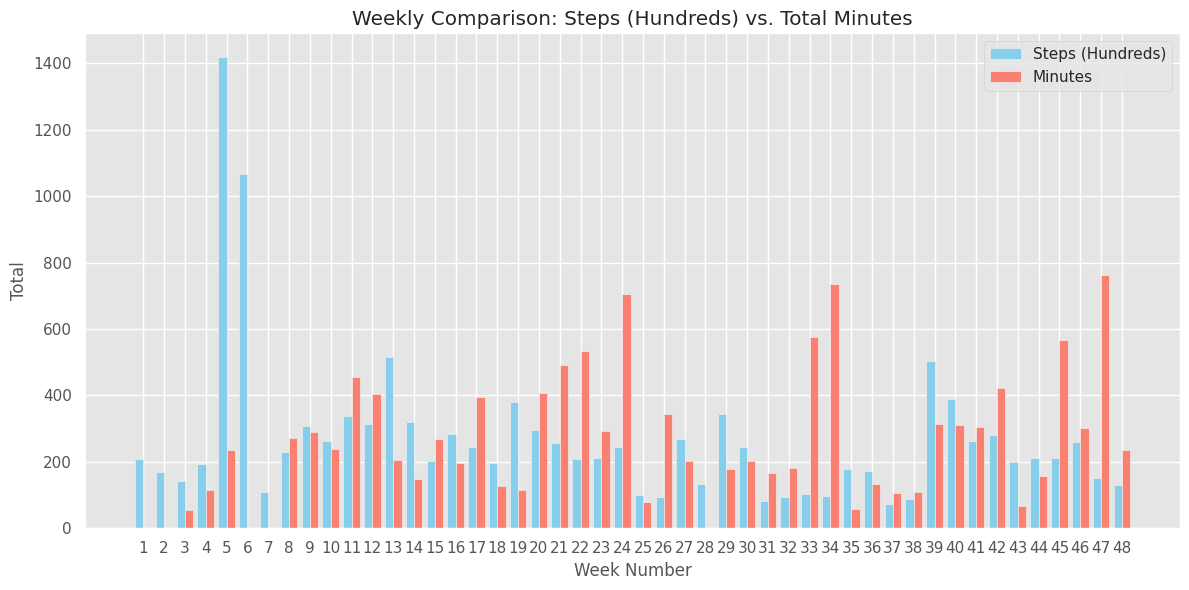

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load step counts data
step_counts_df = pd.read_csv('step_data.csv')  # Replace with your actual file path
step_counts_df['Date'] = pd.to_datetime(step_counts_df['Timestamp']).dt.date

# Filter step counts to start from January 2024
step_counts_df = step_counts_df[step_counts_df['Date'] >= pd.to_datetime('2024-01-01').date()]

# Load activity duration data
activity_df = pd.read_csv('ViewingActivity.csv')  # Replace with your actual file path
activity_df = activity_df[activity_df['Profile Name'] == 'Habibe']
activity_df['Date'] = pd.to_datetime(activity_df['Start Time']).dt.date

# Filter activity data to start from January 2024
activity_df = activity_df[activity_df['Date'] >= pd.to_datetime('2024-01-01').date()]

# Convert 'Duration' to total seconds
activity_df['Duration_in_seconds'] = pd.to_timedelta(activity_df['Duration']).dt.total_seconds()

# Convert seconds to minutes for aggregation
activity_df['Duration_in_minutes'] = activity_df['Duration_in_seconds'] / 60

# Check if conversion to minutes was successful
print("Sample of activity data with duration in minutes:")
print(activity_df[['Start Time', 'Duration', 'Duration_in_minutes']].head())

# Merge the step counts data with activity data by Date
merged_df = pd.merge(
    step_counts_df.groupby('Date')['Steps'].sum().reset_index(),
    activity_df.groupby('Date')['Duration_in_minutes'].sum().reset_index(),
    on='Date',
    how='outer'  # Include all dates from both datasets
).fillna(0)

# Add 'Week' and 'Year' columns for grouping
merged_df['Week'] = pd.to_datetime(merged_df['Date']).dt.isocalendar().week
merged_df['Year'] = pd.to_datetime(merged_df['Date']).dt.year

# Group by Year and Week
weekly_data = merged_df.groupby(['Year', 'Week']).agg({
    'Steps': 'sum',
    'Duration_in_minutes': 'sum'
}).reset_index()

# Divide steps by 100 for visualization purposes
weekly_data['Steps_in_Hundreds'] = weekly_data['Steps'] / 100

# Check the weekly data aggregation
print("Weekly aggregated data:")
print(weekly_data.head())

# Bar plot for weekly comparison
plt.figure(figsize=(12, 6))
bar_width = 0.4

# Bar plot for steps
plt.bar(
    weekly_data['Week'] - bar_width / 2,
    weekly_data['Steps_in_Hundreds'],
    width=bar_width,
    label='Steps (Hundreds)',
    color='skyblue'
)

# Bar plot for minutes
plt.bar(
    weekly_data['Week'] + bar_width / 2,
    weekly_data['Duration_in_minutes'],
    width=bar_width,
    label='Minutes',
    color='salmon'
)

plt.title('Weekly Comparison: Steps (Hundreds) vs. Total Minutes')
plt.xlabel('Week Number')
plt.ylabel('Total')
plt.xticks(weekly_data['Week'])
plt.legend()
plt.tight_layout()
plt.show()


Pearson correlation coefficient: -0.10
P-value: 0.07981
The correlation is not statistically significant. Fail to reject the null hypothesis.


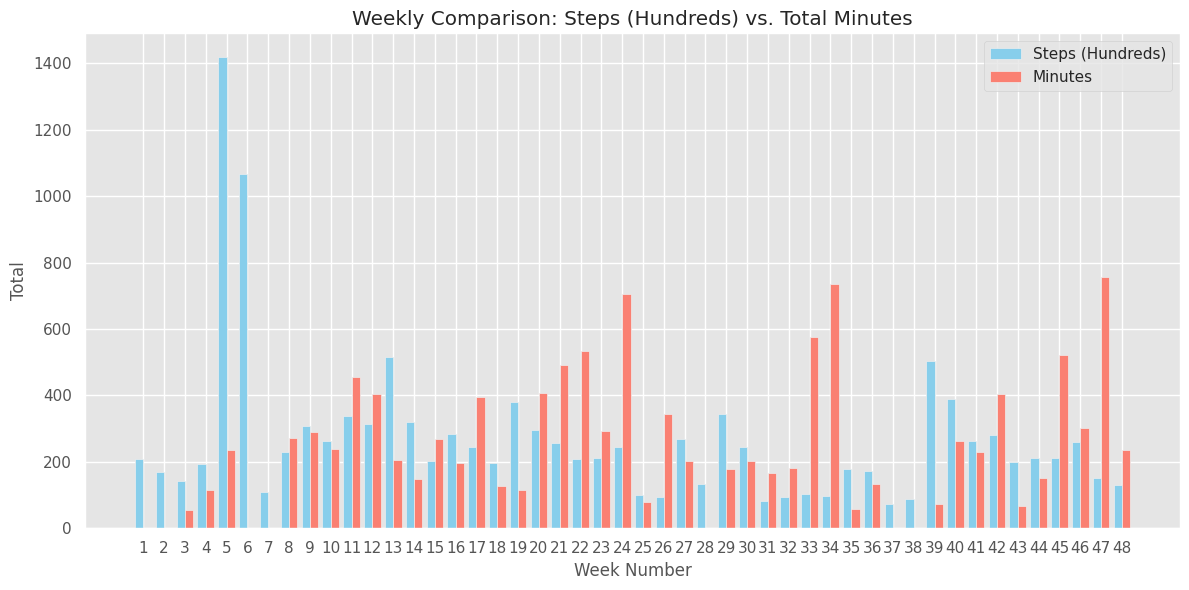

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load step counts data
step_counts_df = pd.read_csv('step_data.csv')
step_counts_df['Date'] = pd.to_datetime(step_counts_df['Timestamp']).dt.date

# Filter step counts to start from January 2024
step_counts_df = step_counts_df[step_counts_df['Date'] >= pd.to_datetime('2024-01-01').date()]

# Load activity duration data
activity_df = pd.read_csv('Filtered_ViewingActivity.csv')
activity_df['Date'] = pd.to_datetime(activity_df['Start Time']).dt.date

# Filter activity data to start from January 2024
activity_df = activity_df[activity_df['Date'] >= pd.to_datetime('2024-01-01').date()]

# Convert 'Duration' to total seconds
activity_df['Duration_in_seconds'] = pd.to_timedelta(activity_df['Duration']).dt.total_seconds()

# Convert seconds to minutes for aggregation
activity_df['Duration_in_minutes'] = activity_df['Duration_in_seconds'] / 60

# Merge the step counts data with activity data by Date
merged_df = pd.merge(
    step_counts_df.groupby('Date')['Steps'].sum().reset_index(),
    activity_df.groupby('Date')['Duration_in_minutes'].sum().reset_index(),
    on='Date',
    how='outer'  # Include all dates from both datasets
).fillna(0)

# Calculate the correlation between steps and duration in minutes
correlation, p_value = pearsonr(merged_df['Steps'], merged_df['Duration_in_minutes'])

# Display correlation results
print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The correlation is statistically significant. Reject the null hypothesis.")
else:
    print("The correlation is not statistically significant. Fail to reject the null hypothesis.")

# Add 'Week' and 'Year' columns for grouping
merged_df['Week'] = pd.to_datetime(merged_df['Date']).dt.isocalendar().week
merged_df['Year'] = pd.to_datetime(merged_df['Date']).dt.year

# Group by Year and Week
weekly_data = merged_df.groupby(['Year', 'Week']).agg({
    'Steps': 'sum',
    'Duration_in_minutes': 'sum'
}).reset_index()

# Divide steps by 100 for visualization purposes
weekly_data['Steps_in_Hundreds'] = weekly_data['Steps'] / 100

# Bar plot for weekly comparison
plt.figure(figsize=(12, 6))
bar_width = 0.4

# Bar plot for steps
plt.bar(
    weekly_data['Week'] - bar_width / 2,
    weekly_data['Steps_in_Hundreds'],
    width=bar_width,
    label='Steps (Hundreds)',
    color='skyblue'
)

# Bar plot for minutes
plt.bar(
    weekly_data['Week'] + bar_width / 2,
    weekly_data['Duration_in_minutes'],
    width=bar_width,
    label='Minutes',
    color='salmon'
)

plt.title('Weekly Comparison: Steps (Hundreds) vs. Total Minutes')
plt.xlabel('Week Number')
plt.ylabel('Total')
plt.xticks(weekly_data['Week'])
plt.legend()
plt.tight_layout()
plt.show()


Pearson correlation coefficient: -0.14
P-value: 0.06550


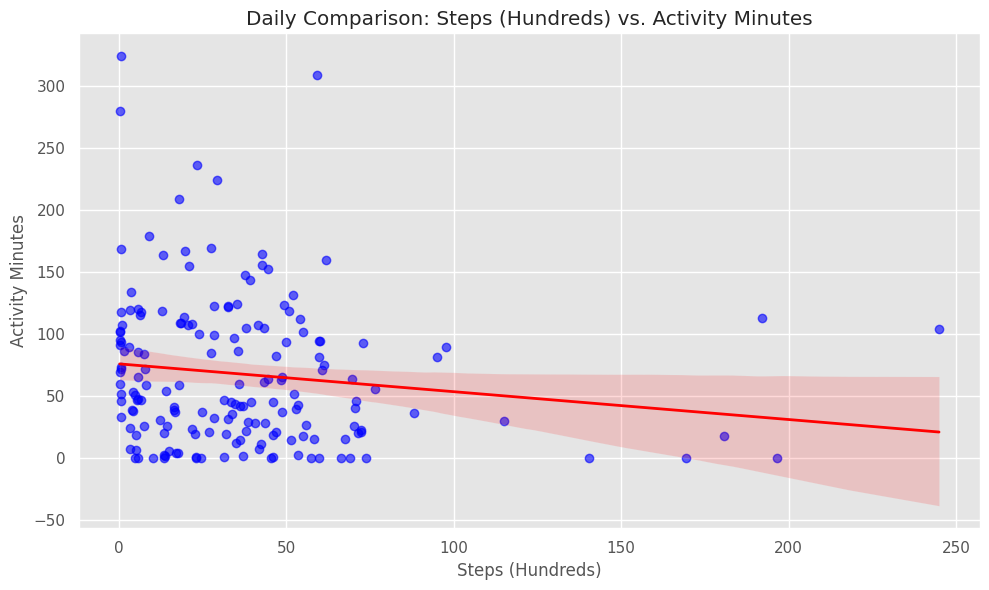

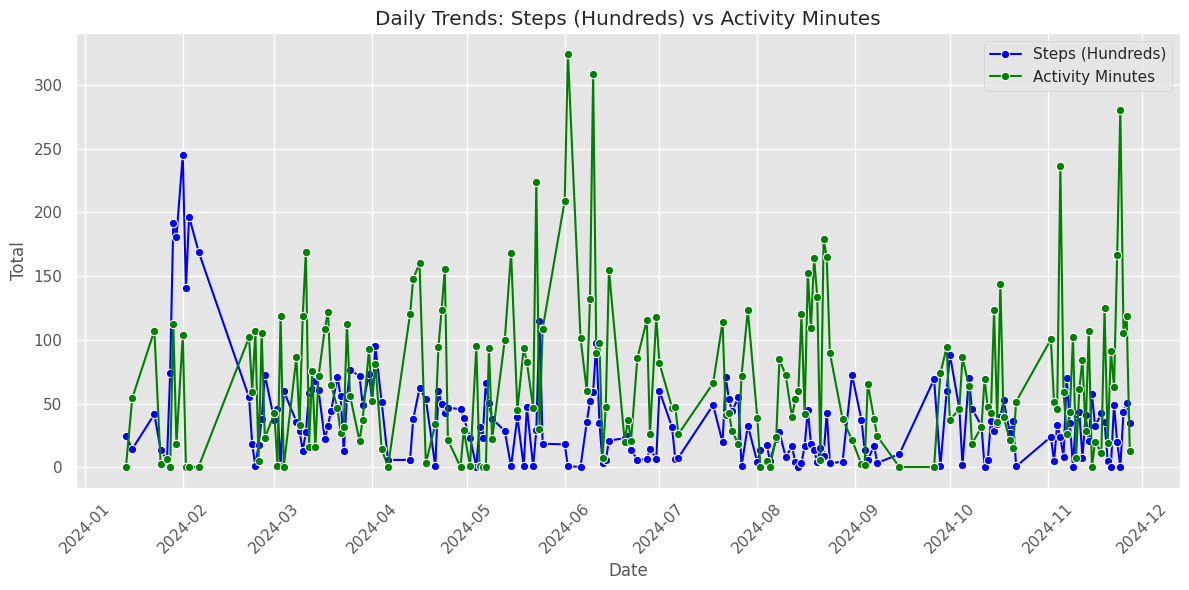

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load step counts data
step_counts_df = pd.read_csv('step_data.csv')
step_counts_df['Date'] = pd.to_datetime(step_counts_df['Timestamp']).dt.date

# Filter step counts to start from January 2024
step_counts_df = step_counts_df[step_counts_df['Date'] >= pd.to_datetime('2024-01-01').date()]

# Load activity duration data
activity_df = pd.read_csv('Filtered_ViewingActivity.csv')
activity_df['Date'] = pd.to_datetime(activity_df['Start Time']).dt.date

# Filter activity data to start from January 2024
activity_df = activity_df[activity_df['Date'] >= pd.to_datetime('2024-01-01').date()]

# Convert 'Duration' to total seconds
activity_df['Duration_in_seconds'] = pd.to_timedelta(activity_df['Duration']).dt.total_seconds()

# Convert seconds to minutes for aggregation
activity_df['Duration_in_minutes'] = activity_df['Duration_in_seconds'] / 60

# Merge the step counts data with activity data by Date
merged_df = pd.merge(
    step_counts_df.groupby('Date')['Steps'].sum().reset_index(),
    activity_df.groupby('Date')['Duration_in_minutes'].sum().reset_index(),
    on='Date',
    how='outer'  # Include all dates from both datasets
).fillna(0)

# Convert steps to hundreds for visualization purposes
merged_df['Steps_in_Hundreds'] = merged_df['Steps'] / 100

# Filter out rows where either 'Steps' or 'Duration_in_minutes' is zero
filtered_df = merged_df[(merged_df['Steps'] > 0) & (merged_df['Duration_in_minutes'] > 0)]

# Calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(filtered_df['Steps'], filtered_df['Duration_in_minutes'])

# Display correlation results
print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.5f}")

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x=filtered_df['Steps_in_Hundreds'],
    y=filtered_df['Duration_in_minutes'],
    line_kws={"color": "red", "lw": 2},
    scatter_kws={"alpha": 0.6, "color": "blue"}
)
plt.title('Daily Comparison: Steps (Hundreds) vs. Activity Minutes')
plt.xlabel('Steps (Hundreds)')
plt.ylabel('Activity Minutes')
plt.grid(True)
plt.tight_layout()
plt.show()

# Daily trend line plots
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='Date', y='Steps_in_Hundreds', label='Steps (Hundreds)', color='blue', marker='o')
sns.lineplot(data=filtered_df, x='Date', y='Duration_in_minutes', label='Activity Minutes', color='green', marker='o')
plt.title('Daily Trends: Steps (Hundreds) vs Activity Minutes')
plt.xlabel('Date')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Correlation Coefficient: -0.14
P-value: 0.0655


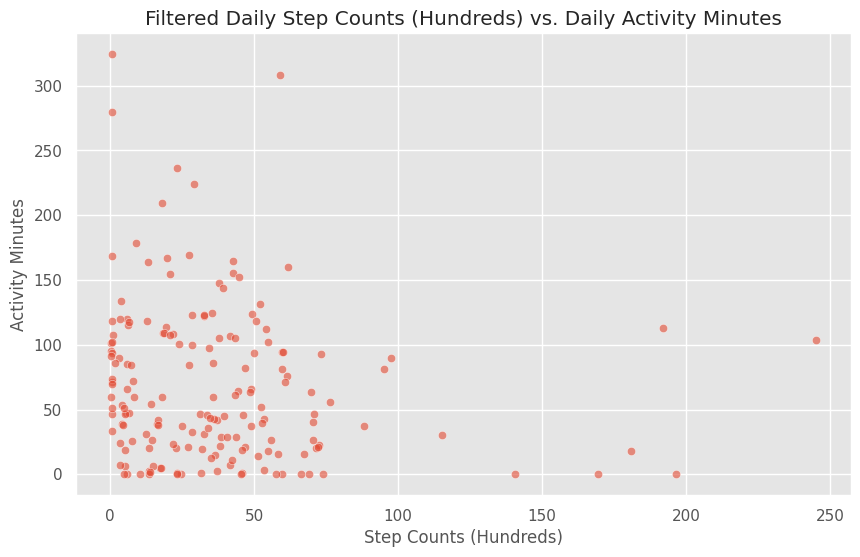

In [ ]:
from scipy.stats import pearsonr

# Filter out rows where either 'Steps' or 'Duration_in_minutes' is zero
filtered_df = merged_df[(merged_df['Steps'] > 0) & (merged_df['Duration_in_minutes'] > 0)]

# Calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(filtered_df['Steps'], filtered_df['Duration_in_minutes'])

# Display the results
print(f"Correlation Coefficient: {corr:.2f}")
print(f"P-value: {p_value:.4f}")

# Visualize the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_df,
    x='Steps_in_Hundreds',
    y='Duration_in_minutes',
    alpha=0.6
)
plt.title('Filtered Daily Step Counts (Hundreds) vs. Daily Activity Minutes')
plt.xlabel('Step Counts (Hundreds)')
plt.ylabel('Activity Minutes')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Load step counts data
step_counts_df = pd.read_csv('step_data.csv')  # Replace with your actual file path
step_counts_df['Date'] = pd.to_datetime(step_counts_df['Timestamp']).dt.date

# Filter step counts to start from January 2024
step_counts_df = step_counts_df[step_counts_df['Date'] >= pd.to_datetime('2024-01-01').date()]

# Load Netflix activity data
activity_df = pd.read_csv('ViewingActivity.csv')  # Replace with your actual file path
activity_df = activity_df[activity_df['Profile Name'] == 'Habibe']
activity_df['Date'] = pd.to_datetime(activity_df['Start Time']).dt.date

# Filter activity data to start from January 2024
activity_df = activity_df[activity_df['Date'] >= pd.to_datetime('2024-01-01').date()]

# Convert 'Duration' to total seconds, then to minutes
activity_df['Duration_in_seconds'] = pd.to_timedelta(activity_df['Duration']).dt.total_seconds()
activity_df['Duration_in_minutes'] = activity_df['Duration_in_seconds'] / 60

# Merge the step counts data with Netflix activity data by Date
merged_df = pd.merge(
    step_counts_df.groupby('Date')['Steps'].sum().reset_index(),
    activity_df.groupby('Date')['Duration_in_minutes'].sum().reset_index(),
    on='Date',
    how='inner'  # Only keep the dates where both step counts and Netflix activity are available
)

# Calculate correlation between steps and Netflix activity minutes
correlation, p_value = pearsonr(merged_df['Steps'], merged_df['Duration_in_minutes'])

# Print the results
print(f"Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpretation of the results
if p_value < 0.05:
    print("The correlation is statistically significant.")
    if correlation < 0:
        print("There is a significant negative correlation between step counts and Netflix activity minutes.")
else:
    print("The correlation is not statistically significant.")


Correlation Coefficient: -0.10725363531380822
P-value: 0.1473018619993015
The correlation is not statistically significant.


<ipython-input-78-5dbe443276c1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Date'] = pd.to_datetime(clean_df['Date'])
<ipython-input-78-5dbe443276c1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['DayOfWeek'] = clean_df['Date'].dt.day_name()
<ipython-input-78-5dbe443276c1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

Spearman Correlation Analysis:

Overall Spearman correlation:
Correlation: -0.1527 (p-value: 0.0386)

Correlation by Step Intensity Level:

Medium Steps:
Correlation: -0.0363 (p-value: 0.7831)
Sample size: 60

Low Steps:
Correlation: -0.4137 (p-value: 0.0008)
Sample size: 62

High Steps:
Correlation: -0.0944 (p-value: 0.4655)
Sample size: 62

Weekly Patterns:

Monday:
Average steps (hundreds): 44.00
Average Netflix minutes: 73.70

Tuesday:
Average steps (hundreds): 57.27
Average Netflix minutes: 73.68

Wednesday:
Average steps (hundreds): 27.16
Average Netflix minutes: 56.08

Thursday:
Average steps (hundreds): 40.60
Average Netflix minutes: 64.56

Friday:
Average steps (hundreds): 45.17
Average Netflix minutes: 43.48

Saturday:
Average steps (hundreds): 22.32
Average Netflix minutes: 74.82

Sunday:
Average steps (hundreds): 27.39
Average Netflix minutes: 79.99


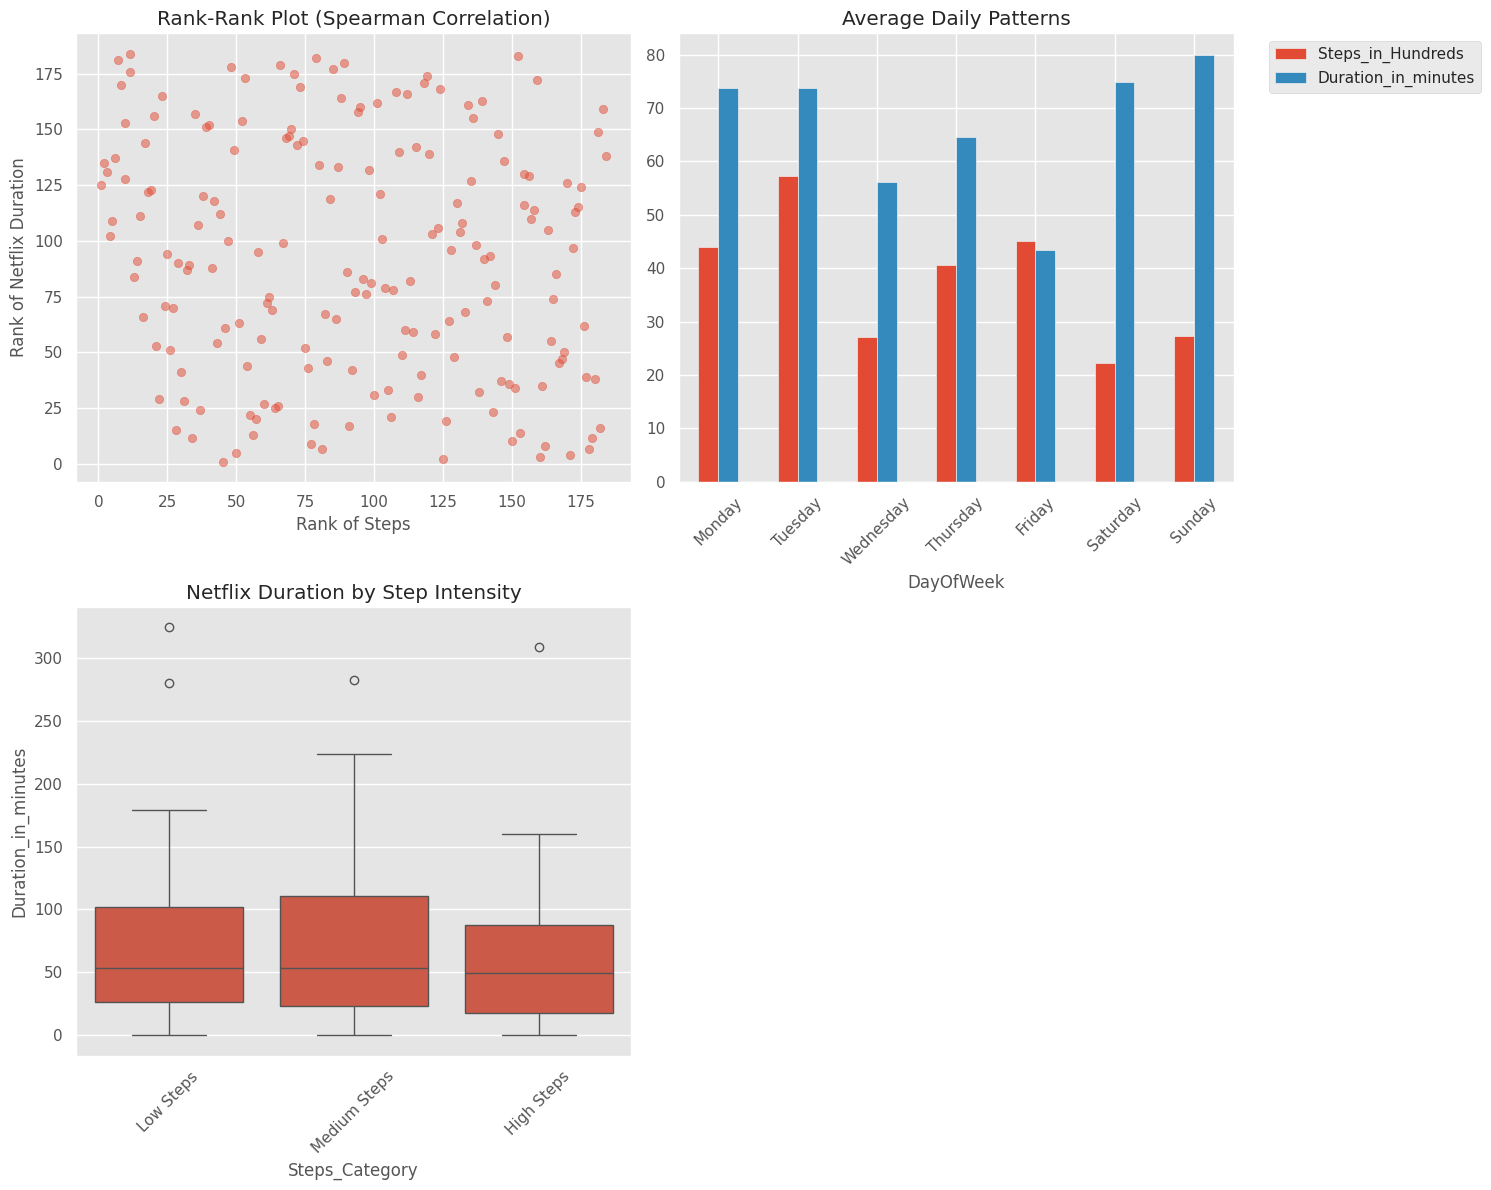

In [ ]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create clean dataset
clean_df = merged_df.dropna(subset=['Duration_in_minutes', 'Steps_in_Hundreds'])

# Add time-based features
clean_df['Date'] = pd.to_datetime(clean_df['Date'])
clean_df['DayOfWeek'] = clean_df['Date'].dt.day_name()
clean_df['Week'] = clean_df['Date'].dt.isocalendar().week

# Create figure for multiple plots
fig = plt.figure(figsize=(15, 12))

# 1. Rank scatter plot to visualize Spearman correlation
plt.subplot(2, 2, 1)
rank_steps = clean_df['Steps_in_Hundreds'].rank()
rank_duration = clean_df['Duration_in_minutes'].rank()
plt.scatter(rank_steps, rank_duration, alpha=0.5)
plt.xlabel('Rank of Steps')
plt.ylabel('Rank of Netflix Duration')
plt.title('Rank-Rank Plot (Spearman Correlation)')

# 2. Weekly patterns
plt.subplot(2, 2, 2)
weekly_data = clean_df.groupby('DayOfWeek').agg({
    'Steps_in_Hundreds': 'mean',
    'Duration_in_minutes': 'mean'
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

weekly_data.plot(kind='bar', ax=plt.gca())
plt.title('Average Daily Patterns')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))

# 3. Intensity levels analysis
plt.subplot(2, 2, 3)
clean_df['Steps_Category'] = pd.qcut(clean_df['Steps_in_Hundreds'],
                                   q=3,
                                   labels=['Low Steps', 'Medium Steps', 'High Steps'])
sns.boxplot(data=clean_df, x='Steps_Category', y='Duration_in_minutes')
plt.title('Netflix Duration by Step Intensity')
plt.xticks(rotation=45)

# Calculate correlations for different step intensity levels
intensity_correlations = []
for category in clean_df['Steps_Category'].unique():
    subset = clean_df[clean_df['Steps_Category'] == category]
    corr, p_val = stats.spearmanr(subset['Steps_in_Hundreds'], subset['Duration_in_minutes'])
    intensity_correlations.append({
        'Category': category,
        'Correlation': corr,
        'P-value': p_val,
        'Sample Size': len(subset)
    })

# Print comprehensive results
print("Spearman Correlation Analysis:\n")
print("Overall Spearman correlation:")
overall_corr, overall_p = stats.spearmanr(clean_df['Steps_in_Hundreds'], clean_df['Duration_in_minutes'])
print(f"Correlation: {overall_corr:.4f} (p-value: {overall_p:.4f})")

print("\nCorrelation by Step Intensity Level:")
for result in intensity_correlations:
    print(f"\n{result['Category']}:")
    print(f"Correlation: {result['Correlation']:.4f} (p-value: {result['P-value']:.4f})")
    print(f"Sample size: {result['Sample Size']}")

print("\nWeekly Patterns:")
for day in weekly_data.index:
    print(f"\n{day}:")
    print(f"Average steps (hundreds): {weekly_data.loc[day, 'Steps_in_Hundreds']:.2f}")
    print(f"Average Netflix minutes: {weekly_data.loc[day, 'Duration_in_minutes']:.2f}")

plt.tight_layout()
plt.show()

<ipython-input-80-62d9b65def19>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Date'] = pd.to_datetime(clean_df['Date'])


Data Time Range:
Start date: 2024-01-14 00:00:00
End date: 2024-11-27 00:00:00
Total number of days: 184

Data from 2024:
Number of days in 2024: 184

Correlation Analysis for 2024 data:
Pearson correlation: -0.1073 (p-value: 0.1473)
Spearman correlation: -0.1527 (p-value: 0.0386)

Monthly Statistics for 2024:
      Steps_in_Hundreds       Duration_in_minutes      
                   mean count                mean count
Month                                                  
1                 68.25     8               37.68     8
2                 95.27    10               50.58    10
3                 46.00    23               63.72    23
4                 43.12    15               69.10    15
5                 32.03    16               69.47    16
6                 23.45    18              108.56    18
7                 35.84    12               58.85    12
8                 16.61    22               72.58    22
9                 42.37    16               47.32    16
10              

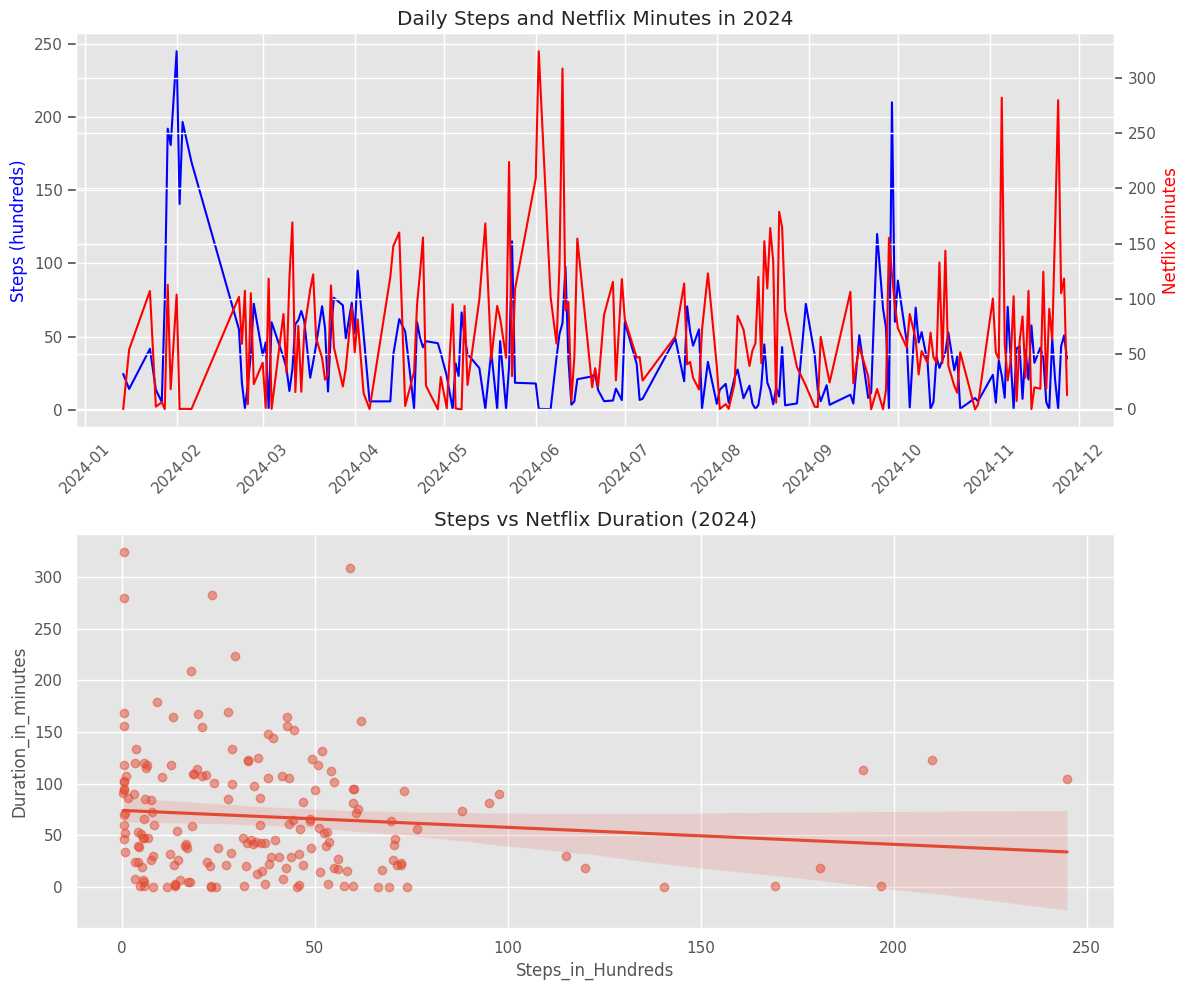

In [ ]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create clean dataset and ensure dates are in correct format
clean_df = merged_df.dropna(subset=['Duration_in_minutes', 'Steps_in_Hundreds'])
clean_df['Date'] = pd.to_datetime(clean_df['Date'])

# Print date range of our data
print("Data Time Range:")
print(f"Start date: {clean_df['Date'].min()}")
print(f"End date: {clean_df['Date'].max()}")
print(f"Total number of days: {len(clean_df)}")

# Filter for 2024 data
df_2024 = clean_df[clean_df['Date'] >= '2024-01-01']
print("\nData from 2024:")
print(f"Number of days in 2024: {len(df_2024)}")

# Calculate correlations for 2024 data
pearson_corr, pearson_p = stats.pearsonr(df_2024['Steps_in_Hundreds'], df_2024['Duration_in_minutes'])
spearman_corr, spearman_p = stats.spearmanr(df_2024['Steps_in_Hundreds'], df_2024['Duration_in_minutes'])

print("\nCorrelation Analysis for 2024 data:")
print(f"Pearson correlation: {pearson_corr:.4f} (p-value: {pearson_p:.4f})")
print(f"Spearman correlation: {spearman_corr:.4f} (p-value: {spearman_p:.4f})")

# Monthly statistics for 2024
df_2024['Month'] = df_2024['Date'].dt.month
monthly_stats = df_2024.groupby('Month').agg({
    'Steps_in_Hundreds': ['mean', 'count'],
    'Duration_in_minutes': ['mean', 'count']
}).round(2)

print("\nMonthly Statistics for 2024:")
print(monthly_stats)

# Visualize 2024 data
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Time series plot
axes[0].plot(df_2024['Date'], df_2024['Steps_in_Hundreds'], label='Steps (hundreds)', color='blue')
axes[0].set_ylabel('Steps (hundreds)', color='blue')
ax2 = axes[0].twinx()
ax2.plot(df_2024['Date'], df_2024['Duration_in_minutes'], label='Netflix minutes', color='red')
ax2.set_ylabel('Netflix minutes', color='red')
axes[0].set_title('Daily Steps and Netflix Minutes in 2024')
axes[0].tick_params(axis='x', rotation=45)

# Scatter plot with regression line for 2024 data
sns.regplot(data=df_2024,
            x='Steps_in_Hundreds',
            y='Duration_in_minutes',
            ax=axes[1],
            scatter_kws={'alpha':0.5})
axes[1].set_title('Steps vs Netflix Duration (2024)')

plt.tight_layout()
plt.show()

Original Data Analysis:
Pearson correlation: -0.1073 (p-value: 0.1473)
Spearman correlation: -0.1527 (p-value: 0.0386)

Outliers Removed Analysis:
Number of data points after removing outliers: 172
Correlation: -0.1101 (p-value: 0.1505)

Descriptive Statistics:
       Steps_in_Hundreds  Duration_in_minutes
count         184.000000           184.000000
mean           37.755978            67.764855
std            39.604709            60.683166
min             0.330000             0.016667
25%             8.200000            21.320833
50%            32.310000            52.183333
75%            51.502500           104.208333
max           244.890000           324.266667


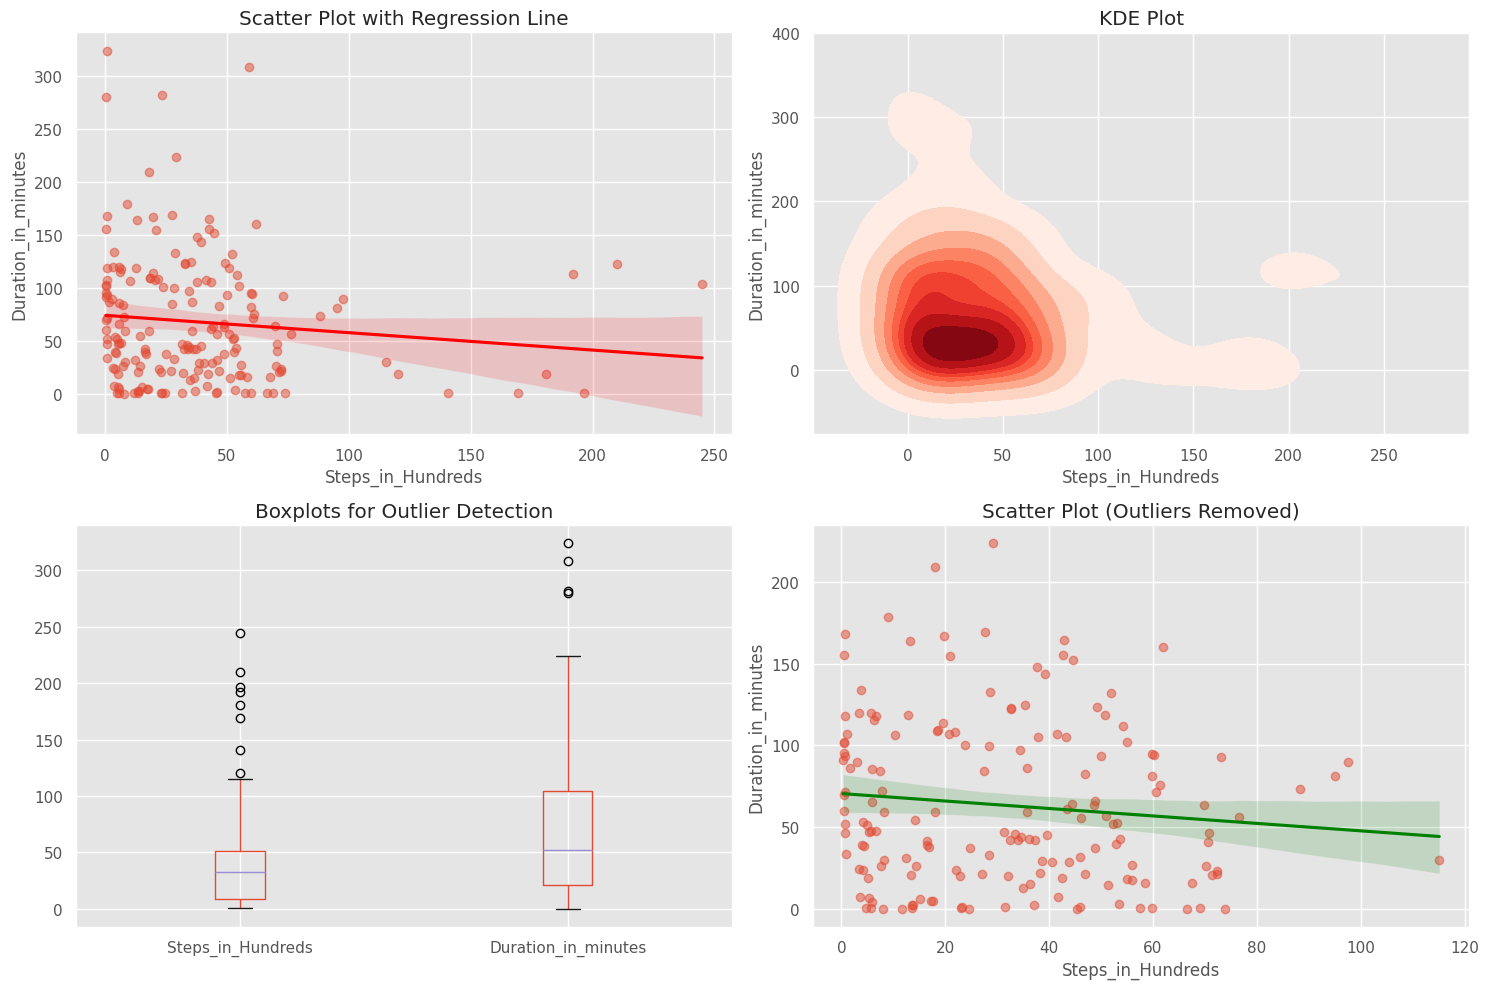

In [ ]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create clean dataset
clean_df = merged_df.dropna(subset=['Duration_in_minutes', 'Steps_in_Hundreds'])

# Create a figure with multiple subplots
fig = plt.figure(figsize=(15, 10))

# 1. Original scatter plot with regression
plt.subplot(2, 2, 1)
sns.regplot(
    data=clean_df,
    x='Steps_in_Hundreds',
    y='Duration_in_minutes',
    scatter_kws={'alpha':0.5},
    line_kws={'color': 'red'}
)
plt.title('Scatter Plot with Regression Line')

# 2. KDE plot
plt.subplot(2, 2, 2)
sns.kdeplot(
    data=clean_df,
    x='Steps_in_Hundreds',
    y='Duration_in_minutes',
    fill=True,
    cmap='Reds'
)
plt.title('KDE Plot')

# 3. Check for outliers using boxplots
plt.subplot(2, 2, 3)
clean_df.boxplot(column=['Steps_in_Hundreds', 'Duration_in_minutes'])
plt.title('Boxplots for Outlier Detection')

# 4. Remove outliers and recalculate correlation
Q1_steps = clean_df['Steps_in_Hundreds'].quantile(0.25)
Q3_steps = clean_df['Steps_in_Hundreds'].quantile(0.75)
IQR_steps = Q3_steps - Q1_steps

Q1_duration = clean_df['Duration_in_minutes'].quantile(0.25)
Q3_duration = clean_df['Duration_in_minutes'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration

filtered_df = clean_df[
    (clean_df['Steps_in_Hundreds'] >= Q1_steps - 1.5 * IQR_steps) &
    (clean_df['Steps_in_Hundreds'] <= Q3_steps + 1.5 * IQR_steps) &
    (clean_df['Duration_in_minutes'] >= Q1_duration - 1.5 * IQR_duration) &
    (clean_df['Duration_in_minutes'] <= Q3_duration + 1.5 * IQR_duration)
]

# Calculate correlations with and without outliers
pearson_corr, pearson_p = stats.pearsonr(clean_df['Steps_in_Hundreds'], clean_df['Duration_in_minutes'])
spearman_corr, spearman_p = stats.spearmanr(clean_df['Steps_in_Hundreds'], clean_df['Duration_in_minutes'])
filtered_corr, filtered_p = stats.pearsonr(filtered_df['Steps_in_Hundreds'], filtered_df['Duration_in_minutes'])

# Plot filtered data
plt.subplot(2, 2, 4)
sns.regplot(
    data=filtered_df,
    x='Steps_in_Hundreds',
    y='Duration_in_minutes',
    scatter_kws={'alpha':0.5},
    line_kws={'color': 'green'}
)
plt.title('Scatter Plot (Outliers Removed)')

plt.tight_layout()

# Print comprehensive results
print("Original Data Analysis:")
print(f"Pearson correlation: {pearson_corr:.4f} (p-value: {pearson_p:.4f})")
print(f"Spearman correlation: {spearman_corr:.4f} (p-value: {spearman_p:.4f})")
print(f"\nOutliers Removed Analysis:")
print(f"Number of data points after removing outliers: {len(filtered_df)}")
print(f"Correlation: {filtered_corr:.4f} (p-value: {filtered_p:.4f})")

# Additional descriptive statistics
print("\nDescriptive Statistics:")
print(clean_df[['Steps_in_Hundreds', 'Duration_in_minutes']].describe())